<h1><div align="center"> <h3><font color='Red'>Credit Card Approval Prediction </font> 
    <br>
</div>

### Phase 1

In [1]:
#importing the libraries

import numpy as np
import pandas as pd



#Preprocessing 
from sklearn.preprocessing import LabelEncoder 

#EDA
import seaborn as sns
import matplotlib.pyplot as plt

#Splitting the data
from sklearn.model_selection import train_test_split

#Scaling the data
from sklearn.preprocessing import StandardScaler

#ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

#Performance checking
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import f1_score


# Data Cleaning / Processing 

### 1. Reading the data


In [2]:
app_record=pd.read_csv("application_record.csv")
cr_record=pd.read_csv("credit_record.csv")

In [3]:
#First view of the application record 
app_record.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

#### Status column tells about bad loans or debts,
0: 1-29 days past due <br>
1: 30-59 days past due <br>
2: 60-89 days overdue <br>
3: 90-119 days overdue <br>
4: 120-149 days overdue <br>
5: Overdue or bad debts, write-offs for more than 150 days<br> 
C: paid off that month <br>
X: No loan for the month<br>

#### So we can divide the good cutomers as 0,C,X and bad customers or who has very high chances of rejection based of bad loans or credits are from 1,2,3,4,5 

In [4]:
#First view of the credit record
cr_record.head(100)

ID  MONTHS_BALANCE STATUS
0   5001711               0      X
1   5001711              -1      0
2   5001711              -2      0
3   5001711              -3      0
4   5001712               0      C
..      ...             ...    ...
95  5001715             -35      X
96  5001715             -36      X
97  5001715             -37      X
98  5001715             -38      X
99  5001715             -39      X

[100 rows x 3 columns]

In [5]:
cr_record['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

## 2. Converting Status Column to Binary by grouping 

In [6]:
cr_record["STATUS"]=cr_record["STATUS"].replace({'0':0,'1':1,'2':1,'3':1,'4':1,'5':1,'C':0,'X':0})

In [7]:
cr_record["STATUS"].value_counts()

0    1034381
1      14194
Name: STATUS, dtype: int64

In [8]:
cr_record.shape

(1048575, 3)

## 3. Merging Datasets 

In [9]:
#Joing the two data sets by innerjoin on IDs
df=app_record.merge(cr_record,on=['ID'],how='inner')

In [10]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].abs()
df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008804           M            Y               Y             0   
2       5008804           M            Y               Y             0   
3       5008804           M            Y               Y             0   
4       5008804           M            Y               Y             0   
...         ...         ...          ...             ...           ...   
777710  5150337           M            N               Y             0   
777711  5150337           M            N               Y             0   
777712  5150337           M            N               Y             0   
777713  5150337           M            N               Y             0   
777714  5150337           M            N               Y             0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0          Working               Higher education   
1               427500.0          Working               Higher education   
2               427500.0          Working               Higher education   
3               427500.0          Working               Higher education   
4               427500.0          Working               Higher education   
...                  ...              ...                            ...   
777710          112500.0          Working  Secondary / secondary special   
777711          112500.0          Working  Secondary / secondary special   
777712          112500.0          Working  Secondary / secondary special   
777713          112500.0          Working  Secondary / secondary special   
777714          112500.0          Working  Secondary / secondary special   

          NAME_FAMILY_STATUS NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage  Rented apartment      -12005           4542   
1             Civil marriage  Rented apartment      -12005           4542   
2             Civil marriage  Rented apartment      -12005           4542   
3             Civil marriage  Rented apartment      -12005           4542   
4             Civil marriage  Rented apartment      -12005           4542   
...                      ...               ...         ...            ...   
777710  Single / not married  Rented apartment       -9188           1193   
777711  Single / not married  Rented apartment       -9188           1193   
777712  Single / not married  Rented apartment       -9188           1193   
777713  Single / not married  Rented apartment       -9188           1193   
777714  Single / not married  Rented apartment       -9188           1193   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0             NaN   
1                1                1           0           0             NaN   
2                1                1           0           0             NaN   
3                1                1           0           0             NaN   
4                1                1           0           0             NaN   
...            ...              ...         ...         ...             ...   
777710           1                0           0           0        Laborers   
777711           1                0           0           0        Laborers   
777712           1                0           0           0        Laborers   
777713           1                0           0           0        Laborers   
777714           1                0           0           0        Laborers   

        CNT_FAM_MEMBERS  MONTHS_BALANCE  STATUS  
0                   2.0               0       0  
1                   2.0              -1       0  
2                   2.0              -2       0  
3                   2.0              -3       0  
4                   2.0              -4       0  
...                 ...             .

# 4. Checking Missing Values in Column 

In [11]:
for i in df.columns:
    print(i)
    print(df[i].isnull().sum())
    print("-------------------------")


ID
0
-------------------------
CODE_GENDER
0
-------------------------
FLAG_OWN_CAR
0
-------------------------
FLAG_OWN_REALTY
0
-------------------------
CNT_CHILDREN
0
-------------------------
AMT_INCOME_TOTAL
0
-------------------------
NAME_INCOME_TYPE
0
-------------------------
NAME_EDUCATION_TYPE
0
-------------------------
NAME_FAMILY_STATUS
0
-------------------------
NAME_HOUSING_TYPE
0
-------------------------
DAYS_BIRTH
0
-------------------------
DAYS_EMPLOYED
0
-------------------------
FLAG_MOBIL
0
-------------------------
FLAG_WORK_PHONE
0
-------------------------
FLAG_PHONE
0
-------------------------
FLAG_EMAIL
0
-------------------------
OCCUPATION_TYPE
240048
-------------------------
CNT_FAM_MEMBERS
0
-------------------------
MONTHS_BALANCE
0
-------------------------
STATUS
0
-------------------------


In [12]:
#Only Occupation type shows NaN values
df['OCCUPATION_TYPE'].value_counts()

Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

# 5. Replacing Nan Values

In [13]:
#Replacing NaN values with Other
df.OCCUPATION_TYPE.replace(np.nan,'Other',inplace=True)

In [14]:
df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008804           M            Y               Y             0   
2       5008804           M            Y               Y             0   
3       5008804           M            Y               Y             0   
4       5008804           M            Y               Y             0   
...         ...         ...          ...             ...           ...   
777710  5150337           M            N               Y             0   
777711  5150337           M            N               Y             0   
777712  5150337           M            N               Y             0   
777713  5150337           M            N               Y             0   
777714  5150337           M            N               Y             0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0          Working               Higher education   
1               427500.0          Working               Higher education   
2               427500.0          Working               Higher education   
3               427500.0          Working               Higher education   
4               427500.0          Working               Higher education   
...                  ...              ...                            ...   
777710          112500.0          Working  Secondary / secondary special   
777711          112500.0          Working  Secondary / secondary special   
777712          112500.0          Working  Secondary / secondary special   
777713          112500.0          Working  Secondary / secondary special   
777714          112500.0          Working  Secondary / secondary special   

          NAME_FAMILY_STATUS NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage  Rented apartment      -12005           4542   
1             Civil marriage  Rented apartment      -12005           4542   
2             Civil marriage  Rented apartment      -12005           4542   
3             Civil marriage  Rented apartment      -12005           4542   
4             Civil marriage  Rented apartment      -12005           4542   
...                      ...               ...         ...            ...   
777710  Single / not married  Rented apartment       -9188           1193   
777711  Single / not married  Rented apartment       -9188           1193   
777712  Single / not married  Rented apartment       -9188           1193   
777713  Single / not married  Rented apartment       -9188           1193   
777714  Single / not married  Rented apartment       -9188           1193   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0           Other   
1                1                1           0           0           Other   
2                1                1           0           0           Other   
3                1                1           0           0           Other   
4                1                1           0           0           Other   
...            ...              ...         ...         ...             ...   
777710           1                0           0           0        Laborers   
777711           1                0           0           0        Laborers   
777712           1                0           0           0        Laborers   
777713           1                0           0           0        Laborers   
777714           1                0           0           0        Laborers   

        CNT_FAM_MEMBERS  MONTHS_BALANCE  STATUS  
0                   2.0               0       0  
1                   2.0              -1       0  
2                   2.0              -2       0  
3                   2.0              -3       0  
4                   2.0              -4       0  
...                 ...             .

## 6. Modifying Values of column

In [15]:
df['DAYS_BIRTH']=df["DAYS_BIRTH"].abs()

In [16]:
df['CurrentEmploymentStatus'] = np.where(df["DAYS_EMPLOYED"]>=0,"Unemployed","Employed")

In [17]:
df["NAME_FAMILY_STATUS"] = df["NAME_FAMILY_STATUS"].replace(["Civil marriage","Married","Single / not married","Separated","Widow"],[1,1,0,0,0])


In [18]:
df["Age"] = round((df.DAYS_BIRTH.abs()/365))


In [19]:
df.describe()

ID   CNT_CHILDREN  AMT_INCOME_TOTAL  NAME_FAMILY_STATUS  \
count  7.777150e+05  777715.000000      7.777150e+05       777715.000000   
mean   5.078743e+06       0.428082      1.885348e+05            0.780441   
std    4.180442e+04       0.745755      1.016225e+05            0.413948   
min    5.008804e+06       0.000000      2.700000e+04            0.000000   
25%    5.044568e+06       0.000000      1.215000e+05            1.000000   
50%    5.069530e+06       0.000000      1.620000e+05            1.000000   
75%    5.115551e+06       1.000000      2.250000e+05            1.000000   
max    5.150487e+06      19.000000      1.575000e+06            1.000000   

          DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
count  777715.000000  777715.000000    777715.0    777715.000000   
mean    16124.937046   62424.703960         1.0         0.231818   
std      4104.304018  134408.839493         0.0         0.421993   
min      7489.000000      17.000000         1.0         0.000000   
25%     12716.000000    1259.000000         1.0         0.000000   
50%     15760.000000    2684.000000         1.0         0.000000   
75%     19453.000000    5819.000000         1.0         0.000000   
max     25152.000000  365243.000000         1.0         1.000000   

          FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
count  777715.000000  777715.000000    777715.000000   777715.000000   
mean        0.300965       0.091675         2.208837      -19.373564   
std         0.458678       0.288567         0.907380       14.082208   
min         0.000000       0.000000         1.000000      -60.000000   
25%         0.000000       0.000000         2.000000      -29.000000   
50%         0.000000       0.000000         2.000000      -17.000000   
75%         1.000000       0.000000         3.000000       -8.000000   
max         1.000000       1.000000        20.000000        0.000000   

              STATUS            Age  
count  777715.000000  777715.000000  
mean        0.014883      44.188988  
std         0.121086      11.255300  
min         0.000000      21.000000  
25%         0.000000      35.000000  
50%         0.000000      43.000000  
75%         0.000000      53.000000  
max         1.000000      69.000000

In [20]:
df.dtypes

ID                           int64
CODE_GENDER                 object
FLAG_OWN_CAR                object
FLAG_OWN_REALTY             object
CNT_CHILDREN                 int64
AMT_INCOME_TOTAL           float64
NAME_INCOME_TYPE            object
NAME_EDUCATION_TYPE         object
NAME_FAMILY_STATUS           int64
NAME_HOUSING_TYPE           object
DAYS_BIRTH                   int64
DAYS_EMPLOYED                int64
FLAG_MOBIL                   int64
FLAG_WORK_PHONE              int64
FLAG_PHONE                   int64
FLAG_EMAIL                   int64
OCCUPATION_TYPE             object
CNT_FAM_MEMBERS            float64
MONTHS_BALANCE               int64
STATUS                       int64
CurrentEmploymentStatus     object
Age                        float64
dtype: object

# 7. Dropping Columns

In [21]:
#Droping Duplicates, Everything was same except Months Balance therfore dropping the same rows
df1=df.drop("MONTHS_BALANCE",axis=1).drop_duplicates()

In [22]:
df1.shape

(40747, 21)

# 8. Checking Categorical values 

In [23]:
#Checking the categorical values distribution before Label Encoding
cat_cols = []
for i in df1.columns:
    if df1[i].dtype=='object':
        cat_cols.append(i)
        print(df1[i].value_counts())
        print("---------------------------------------------")
    else:
        continue

F    27187
M    13560
Name: CODE_GENDER, dtype: int64
---------------------------------------------
N    25335
Y    15412
Name: FLAG_OWN_CAR, dtype: int64
---------------------------------------------
Y    27235
N    13512
Name: FLAG_OWN_REALTY, dtype: int64
---------------------------------------------
Working                 20999
Commercial associate     9570
Pensioner                6796
State servant            3370
Student                    12
Name: NAME_INCOME_TYPE, dtype: int64
---------------------------------------------
Secondary / secondary special    27667
Higher education                 11011
Incomplete higher                 1617
Lower secondary                    413
Academic degree                     39
Name: NAME_EDUCATION_TYPE, dtype: int64
---------------------------------------------
House / apartment      36329
With parents            2003
Municipal apartment     1278
Rented apartment         655
Office apartment         300
Co-op apartment          182
Name: N

In [24]:
cat_cols
df22=df1
#print(df22['NAME_EDUCATION_TYPE'].unique())
df22




ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
13      5008804           M            Y               Y             0   
16      5008805           M            Y               Y             0   
28      5008805           M            Y               Y             0   
31      5008806           M            Y               Y             0   
...         ...         ...          ...             ...           ...   
777672  5149838           F            N               Y             0   
777691  5150049           F            N               Y             0   
777693  5150049           F            N               Y             0   
777701  5150337           M            N               Y             0   
777711  5150337           M            N               Y             0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0          Working               Higher education   
13              427500.0          Working               Higher education   
16              427500.0          Working               Higher education   
28              427500.0          Working               Higher education   
31              112500.0          Working  Secondary / secondary special   
...                  ...              ...                            ...   
777672          157500.0        Pensioner               Higher education   
777691          283500.0          Working  Secondary / secondary special   
777693          283500.0          Working  Secondary / secondary special   
777701          112500.0          Working  Secondary / secondary special   
777711          112500.0          Working  Secondary / secondary special   

        NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  ...  DAYS_EMPLOYED  FLAG_MOBIL  \
0                        1   Rented apartment  ...           4542           1   
13                       1   Rented apartment  ...           4542           1   
16                       1   Rented apartment  ...           4542           1   
28                       1   Rented apartment  ...           4542           1   
31                       1  House / apartment  ...           1134           1   
...                    ...                ...  ...            ...         ...   
777672                   1  House / apartment  ...           1325           1   
777691                   1  House / apartment  ...            655           1   
777693                   1  House / apartment  ...            655           1   
777701                   0   Rented apartment  ...           1193           1   
777711                   0   Rented apartment  ...           1193           1   

        FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
0                     1           0           0            Other   
13                    1           0           0            Other   
16                    1           0           0            Other   
28                    1           0           0            Other   
31                    0           0           0   Security staff   
...                 ...         ...         ...              ...   
777672                0           1           1   Medicine staff   
777691                0           0           0      Sales staff   
777693                0           0           0      Sales staff   
777701                0           0           0         Laborers   
777711                0           0           0         Laborers   

       CNT_FAM_MEMBERS  STATUS  CurrentEmploymentStatus   Age  
0                  2.0       0               Unemployed  33.0  
13                 2.0       1               Unemployed  33.0  
16                 2.0       0               Unemployed  33.0  
28                 2.0       1               Unemployed  33.0  
31                 2.0       0               Unemployed  59.0  
...                ...     ...       

In [25]:
print(df22['OCCUPATION_TYPE'].unique())


['Other' 'Security staff' 'Sales staff' 'Accountants' 'Laborers'
 'Managers' 'Drivers' 'Core staff' 'High skill tech staff'
 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Low-skill Laborers' 'Medicine staff' 'Secretaries'
 'Waiters/barmen staff' 'HR staff' 'Realty agents' 'IT staff']


In [26]:
print(df22.loc[36525, 'OCCUPATION_TYPE'])


HR staff


## 9. Conversion of string data to Numerical Values (Encoding)

In [27]:
ef=LabelEncoder()

In [28]:
for i in df1.columns:
    if i!='NAME_FAMILY_STATUS':
        if i in cat_cols:
            df1[i]=ef.fit_transform(df1[i])
    else:
        continue
        

In [29]:
df1 = df1.drop(columns = ['FLAG_EMAIL', 'FLAG_MOBIL'])


In [30]:
df1[df1['OCCUPATION_TYPE']==5]

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
36525   5010962            0             0                0             0   
36533   5010963            0             0                0             0   
36541   5010964            0             0                0             0   
36580   5010965            0             0                0             0   
36588   5010966            0             0                0             0   
...         ...          ...           ...              ...           ...   
736892  5146353            1             1                0             2   
736915  5146354            1             1                0             2   
736917  5146354            1             1                0             2   
771281  5050731            0             0                0             0   
771320  5050731            0             0                0             0   

        AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
36525           256500.0                 0                    1   
36533           256500.0                 0                    1   
36541           256500.0                 0                    1   
36580           256500.0                 0                    1   
36588           256500.0                 0                    1   
...                  ...               ...                  ...   
736892          180000.0                 0                    1   
736915          180000.0                 0                    1   
736917          180000.0                 0                    1   
771281          135000.0                 0                    1   
771320          135000.0                 0                    1   

        NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
36525                    1                  1       11212           2565   
36533                    1                  1       11212           2565   
36541                    1                  1       11212           2565   
36580                    1                  1       11212           2565   
36588                    1                  1       11212           2565   
...                    ...                ...         ...            ...   
736892                   1                  1       11988           1497   
736915                   1                  1       11988           1497   
736917                   1                  1       11988           1497   
771281                   0                  1       11712           4822   
771320                   0                  1       11712           4822   

        FLAG_WORK_PHONE  FLAG_PHONE  OCCUPATION_TYPE  CNT_FAM_MEMBERS  STATUS  \
36525                 0           0                5              2.0       0   
36533                 0           0                5              2.0       0   
36541                 0           0                5              2.0       0   
36580                 0           0                5              2.0       0   
36588                 0           0                5              2.0       0   
...                 ...         ...              ...              ...     ...   
736892                0           1                5              4.0       0   
736915                0           1                5              4.0       0   
736917                0           1                5              4.0       1   
771281                0           1                5              1.0       0   
771320                0           1                5              1.0       1   

        CurrentEmploymentStatus   Age  
36525                         0  31.0  
36533                         0  31.0  
36541                         0  31.0  
36580                         0  31.0  
36588                         0  31.0  
...                         ...   ...  
736892                        0  33.0  
736915                        0  33.0  
736917                        0  33.0

# 10. Scaling the Data 

In [31]:
print(df1['DAYS_EMPLOYED'])

0         4542
13        4542
16        4542
28        4542
31        1134
          ... 
777672    1325
777691     655
777693     655
777701    1193
777711    1193
Name: DAYS_EMPLOYED, Length: 40747, dtype: int64


# Exploratory Data Analysis

##  1. Pairplot 
Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.

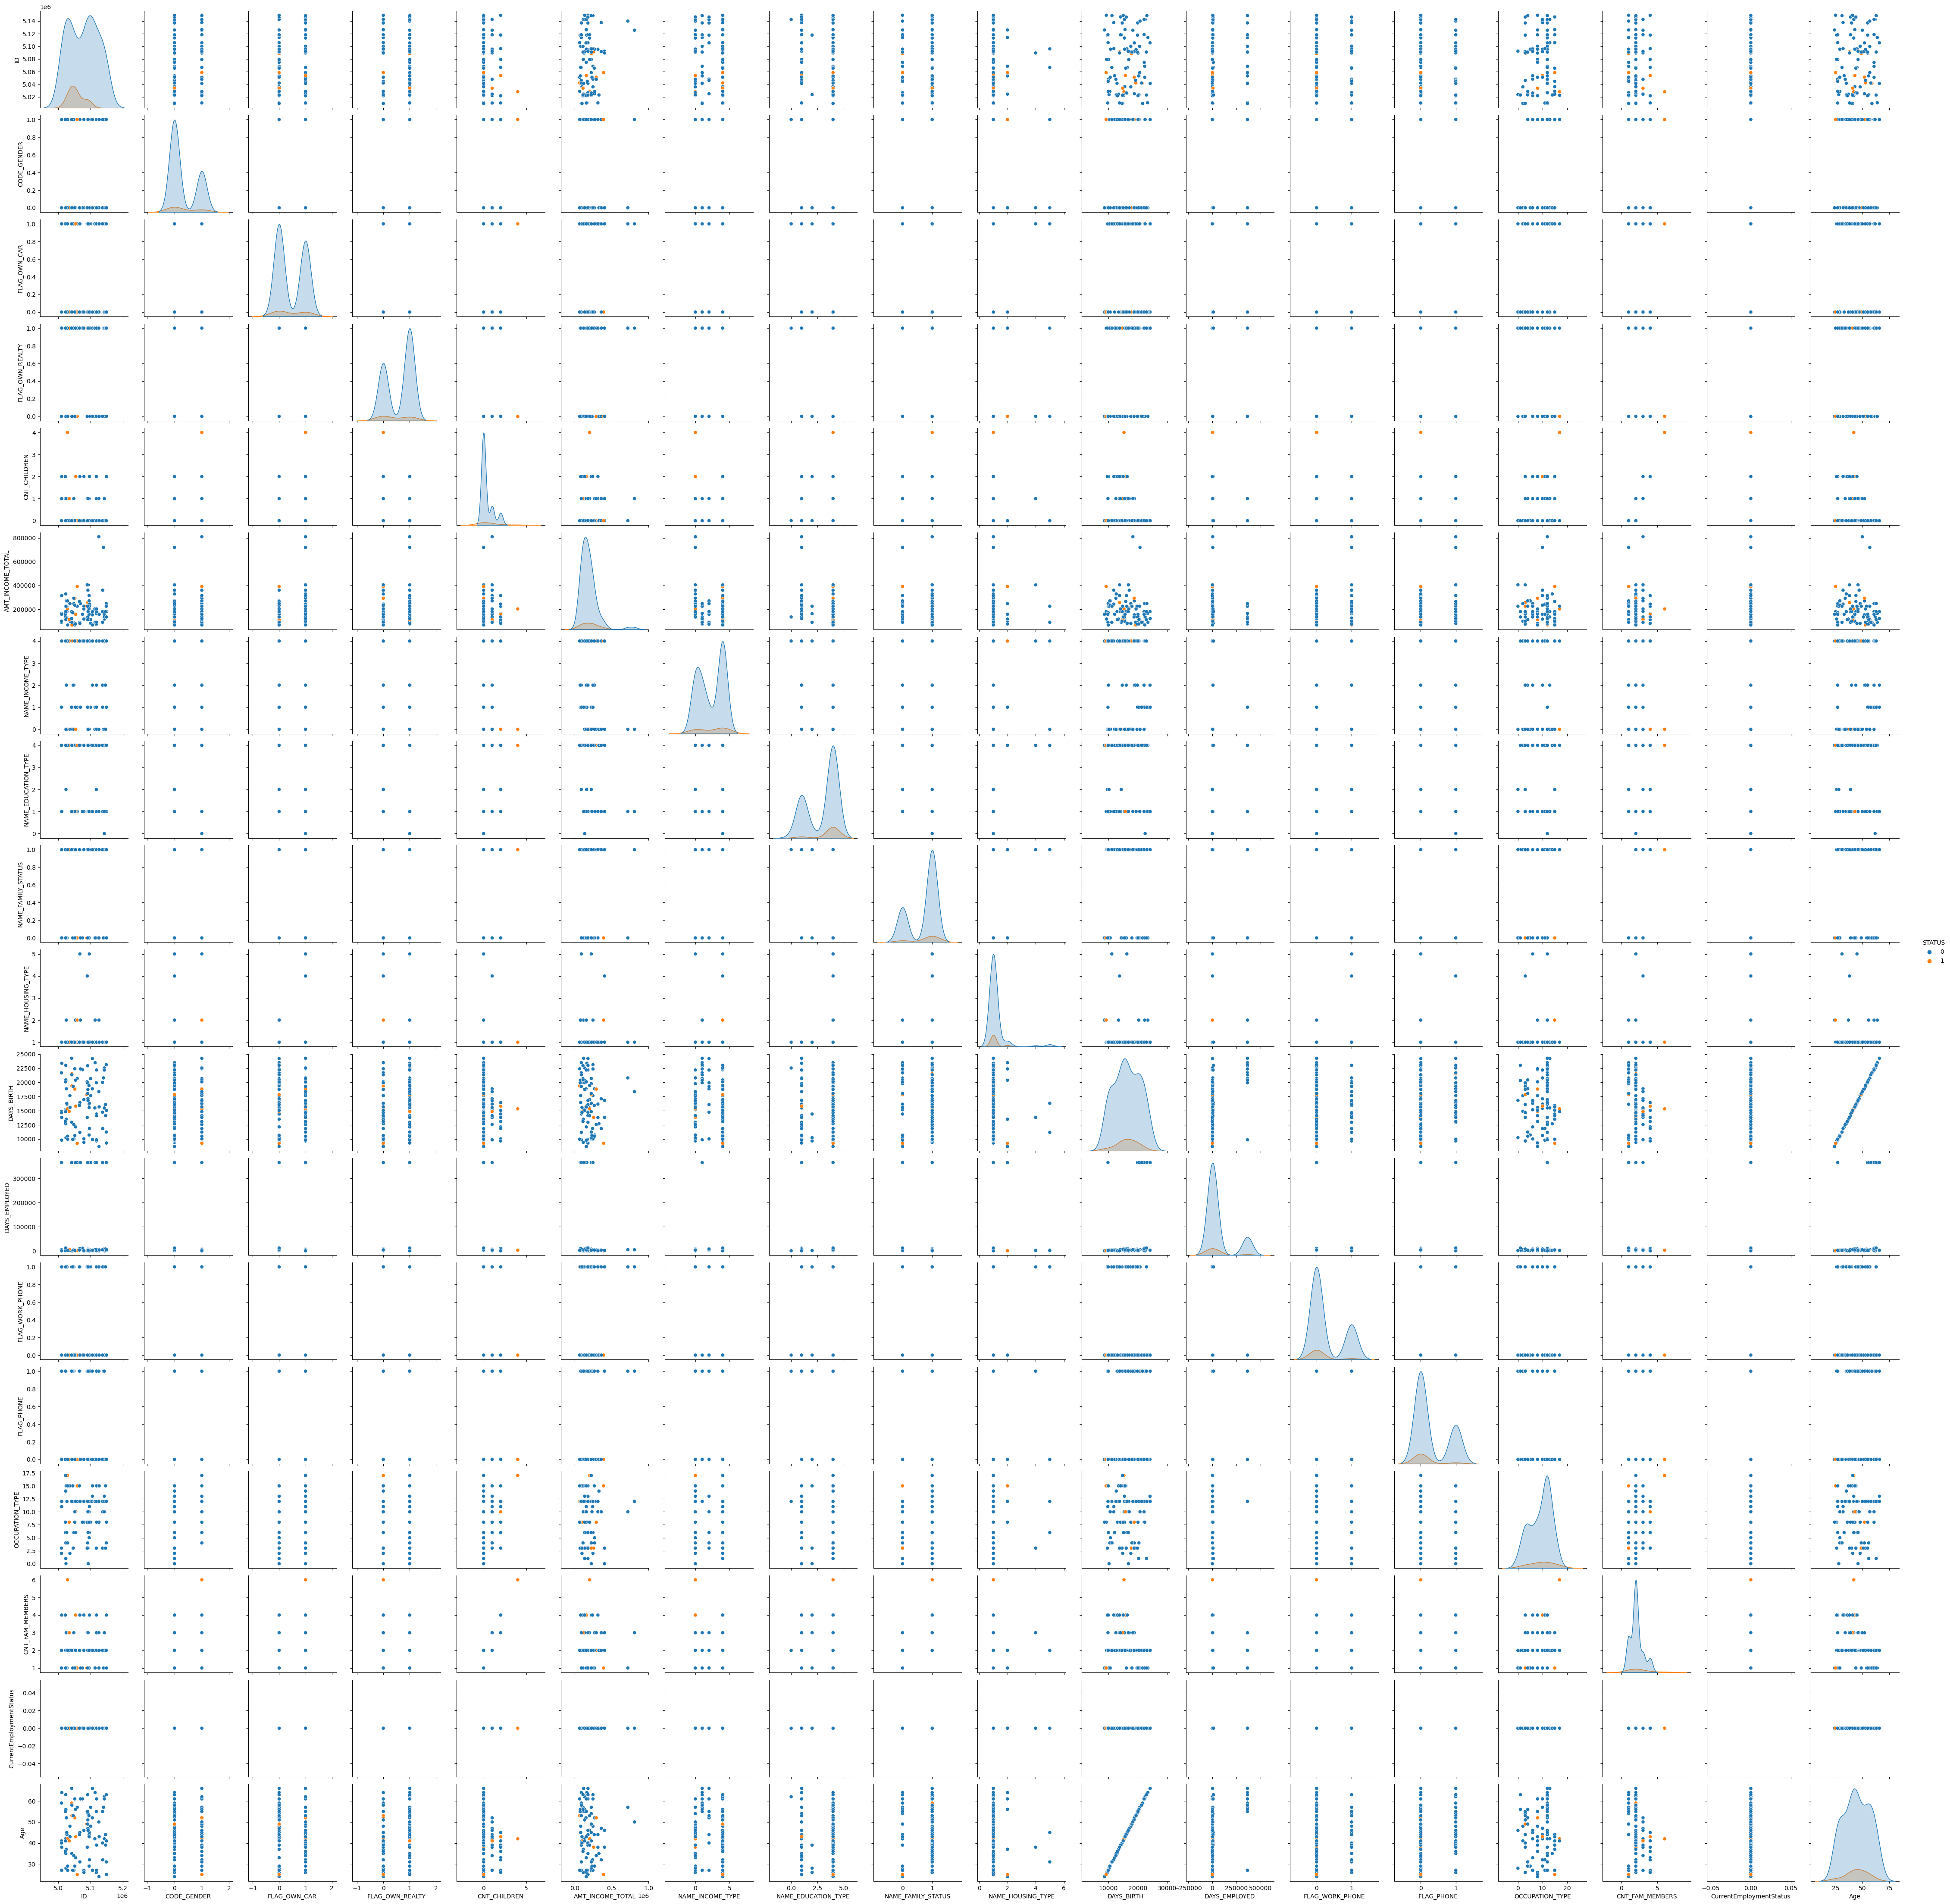

In [32]:
sns.pairplot(df1.sample(100),hue='STATUS')

## 2. Checking out the distributions via bar plots

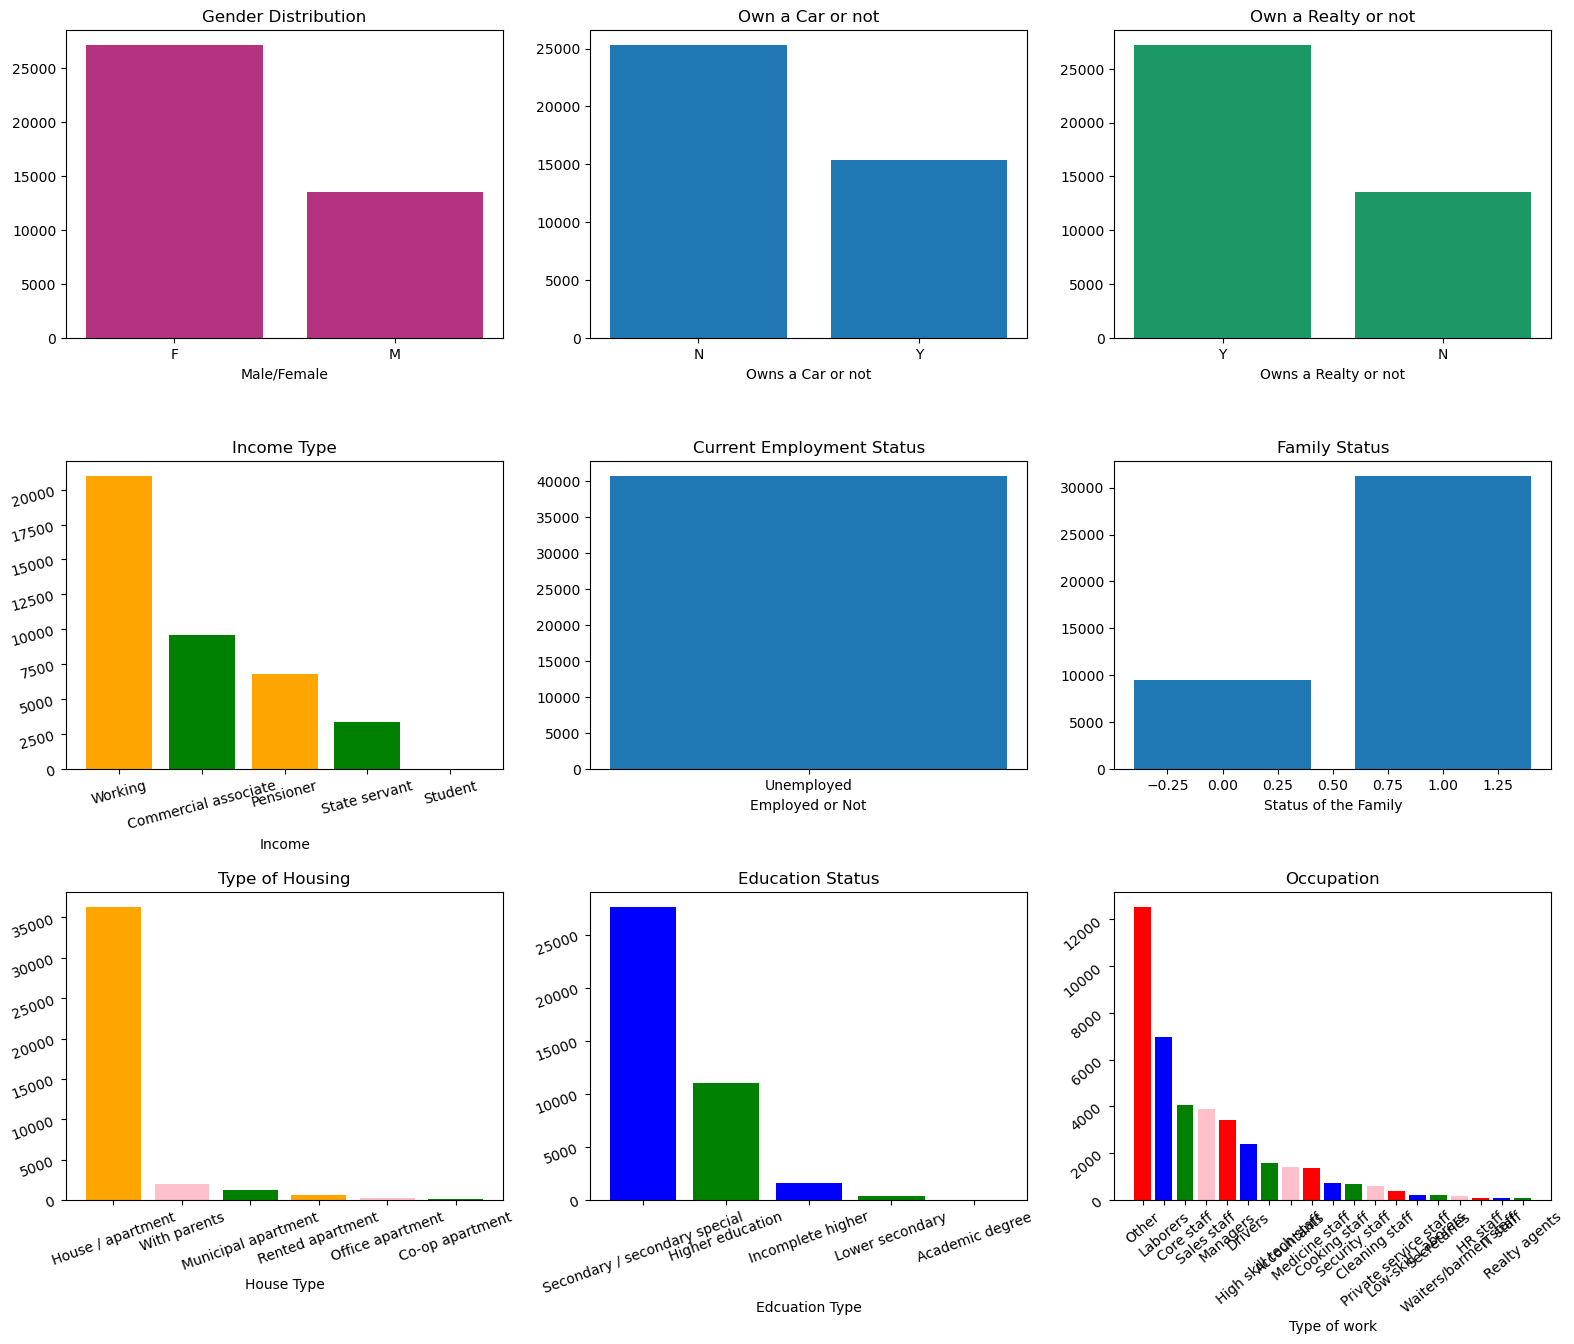

In [33]:
fig, axs = plt.subplots(3,3, figsize=(15,15))
# gs = fig.add_gridspec(3, hspace=3)
# axs = gs.subplots(sharex=True, sharey=True)

axs[0,0].bar(x=df["CODE_GENDER"].value_counts().index,height=df1["CODE_GENDER"].value_counts(),color=(0.7,0.2,0.5))
axs[0, 0].set_title('Gender Distribution')
axs[0,0].set(xlabel='Male/Female')

axs[0,1].bar(x=df["FLAG_OWN_CAR"].value_counts().index,height=df1["FLAG_OWN_CAR"].value_counts())
axs[0,1].set_title('Own a Car or not')
axs[0,1].set(xlabel='Owns a Car or not')

axs[0,2].bar(x=df["FLAG_OWN_REALTY"].value_counts().index,height=df1["FLAG_OWN_REALTY"].value_counts(),color=(0.1,0.6,0.4))
axs[0,2].set_title('Own a Realty or not')
axs[0,2].set(xlabel='Owns a Realty or not')

axs[1,0].bar(x=df["NAME_INCOME_TYPE"].value_counts().index,height=df1["NAME_INCOME_TYPE"].value_counts(),color=['orange','green'])
axs[1,0].set_title('Income Type')
axs[1,0].set(xlabel='Income')
axs[1,0].tick_params(labelrotation=15)

axs[1,1].bar(x=df["CurrentEmploymentStatus"].value_counts().index,height=df1["CurrentEmploymentStatus"].value_counts())
axs[1,1].set_title('Current Employment Status')
axs[1,1].set(xlabel='Employed or Not')

axs[1,2].bar(x=df["NAME_FAMILY_STATUS"].value_counts().index,height=df1["NAME_FAMILY_STATUS"].value_counts())
axs[1,2].set_title('Family Status')
axs[1,2].set(xlabel='Status of the Family')

axs[2,0].bar(x=df["NAME_HOUSING_TYPE"].value_counts().index,height=df1["NAME_HOUSING_TYPE"].value_counts(),color=['orange','pink','green'])
axs[2,0].set_title('Type of Housing')
axs[2,0].tick_params(labelrotation=20)
axs[2,0].set(xlabel='House Type')

axs[2,1].bar(x=df["NAME_EDUCATION_TYPE"].value_counts().index,height=df1["NAME_EDUCATION_TYPE"].value_counts(),color=['blue','green'])
axs[2,1].set_title('Education Status')
axs[2,1].tick_params(labelrotation=20)
axs[2,1].set(xlabel='Edcuation Type')

axs[2,2].bar(x=df["OCCUPATION_TYPE"].value_counts().index,height=df1["OCCUPATION_TYPE"].value_counts(),color=['red','blue','green','pink'])
axs[2,2].set_title('Occupation')
axs[2,2].tick_params(labelrotation=40)
axs[2,2].set(xlabel='Type of work')

fig.subplots_adjust(left=0.01, right=1, bottom=0.1, top=0.88,
                    hspace=0.4, wspace=0.2)
plt.show()

## 3. Exploring the gender distribution among car owners and non car owners, house owner or not

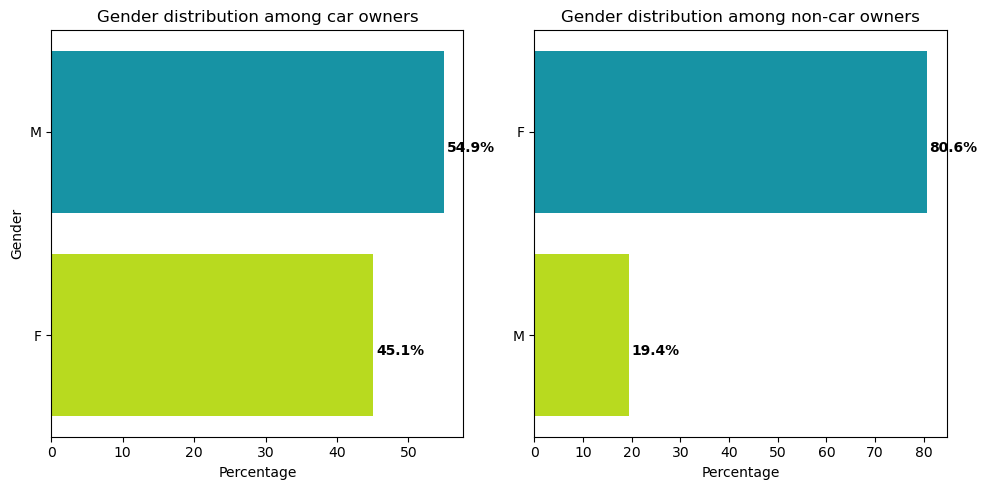

In [34]:
car_owners_counts = df[df['FLAG_OWN_CAR'] == 'Y']['CODE_GENDER'].value_counts()
car_owners_percentages = car_owners_counts/car_owners_counts.sum() * 100

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
sns.barplot(ax=axes[0], x=car_owners_percentages.values, y=car_owners_percentages.index, palette='nipy_spectral')
for i, v in enumerate(car_owners_percentages.values):
    axes[0].text(v + 0.5, i + .1, str(round(v, 1)) + '%', color='black', fontweight='bold')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Gender')
axes[0].set_title('Gender distribution among car owners')

# count of males and females among those who don't own a car
non_car_owners_counts = df[df['FLAG_OWN_CAR'] == 'N']['CODE_GENDER'].value_counts()
non_car_owners_percentages = non_car_owners_counts / non_car_owners_counts.sum() * 100

sns.barplot(ax=axes[1],x=non_car_owners_percentages.values, y=non_car_owners_percentages.index, palette='nipy_spectral')
for i, v in enumerate(non_car_owners_percentages.values):
    axes[1].text(v + 0.5, i + .1, str(round(v, 1)) + '%', color='black', fontweight='bold')
axes[1].set_xlabel('Percentage')
axes[1].set_ylabel('')
axes[1].set_title('Gender distribution among non-car owners')

plt.tight_layout()
plt.show()

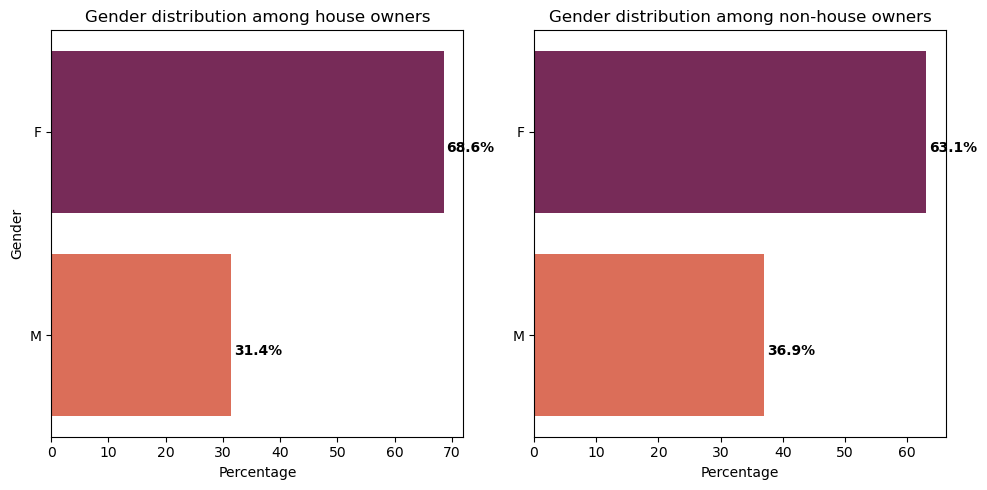

In [35]:
house_owner_counts = df[df['FLAG_OWN_REALTY'] == 'Y']['CODE_GENDER'].value_counts()
house_owner_percentages = house_owner_counts/house_owner_counts.sum() * 100

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
sns.barplot(ax=axes[0], x=house_owner_percentages.values, y=house_owner_percentages.index, palette='rocket')
for i, v in enumerate(house_owner_percentages.values):
    axes[0].text(v + 0.5, i + .1, str(round(v, 1)) + '%', color='black', fontweight='bold')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Gender')
axes[0].set_title('Gender distribution among house owners')

# count of males and females among those who don't own a house
non_house_owner_counts = df[df['FLAG_OWN_REALTY'] == 'N']['CODE_GENDER'].value_counts()
non_house_owner_percentages = non_house_owner_counts / non_house_owner_counts.sum() * 100

sns.barplot(ax=axes[1],x=non_house_owner_percentages.values, y=non_house_owner_percentages.index, palette='rocket')
for i, v in enumerate(non_house_owner_percentages.values):
    axes[1].text(v + 0.5, i + .1, str(round(v, 1)) + '%', color='black', fontweight='bold')
axes[1].set_xlabel('Percentage')
axes[1].set_ylabel('')
axes[1].set_title('Gender distribution among non-house owners')

plt.tight_layout()
plt.show()

### Insights from above Plots 

1. Males are 33.3 % and Females are 66.7% of the number of applicants
2. Maximum People don't own a car
3. Most of the people do have a property
4. Among the applicants most are of working class, followed by Commercial Associate, followed by Pensioner, State Servant and very few students
5. Most of them do have secondary education and some do have higher education too.
6. Among the applicants most of them are married
7. Most of them live in a house/ apartment and very few live with their parents
8. Majority of the applicants are employed and again very few are unemployed



## 4. Plotting the Heatmap via coorelation matrix

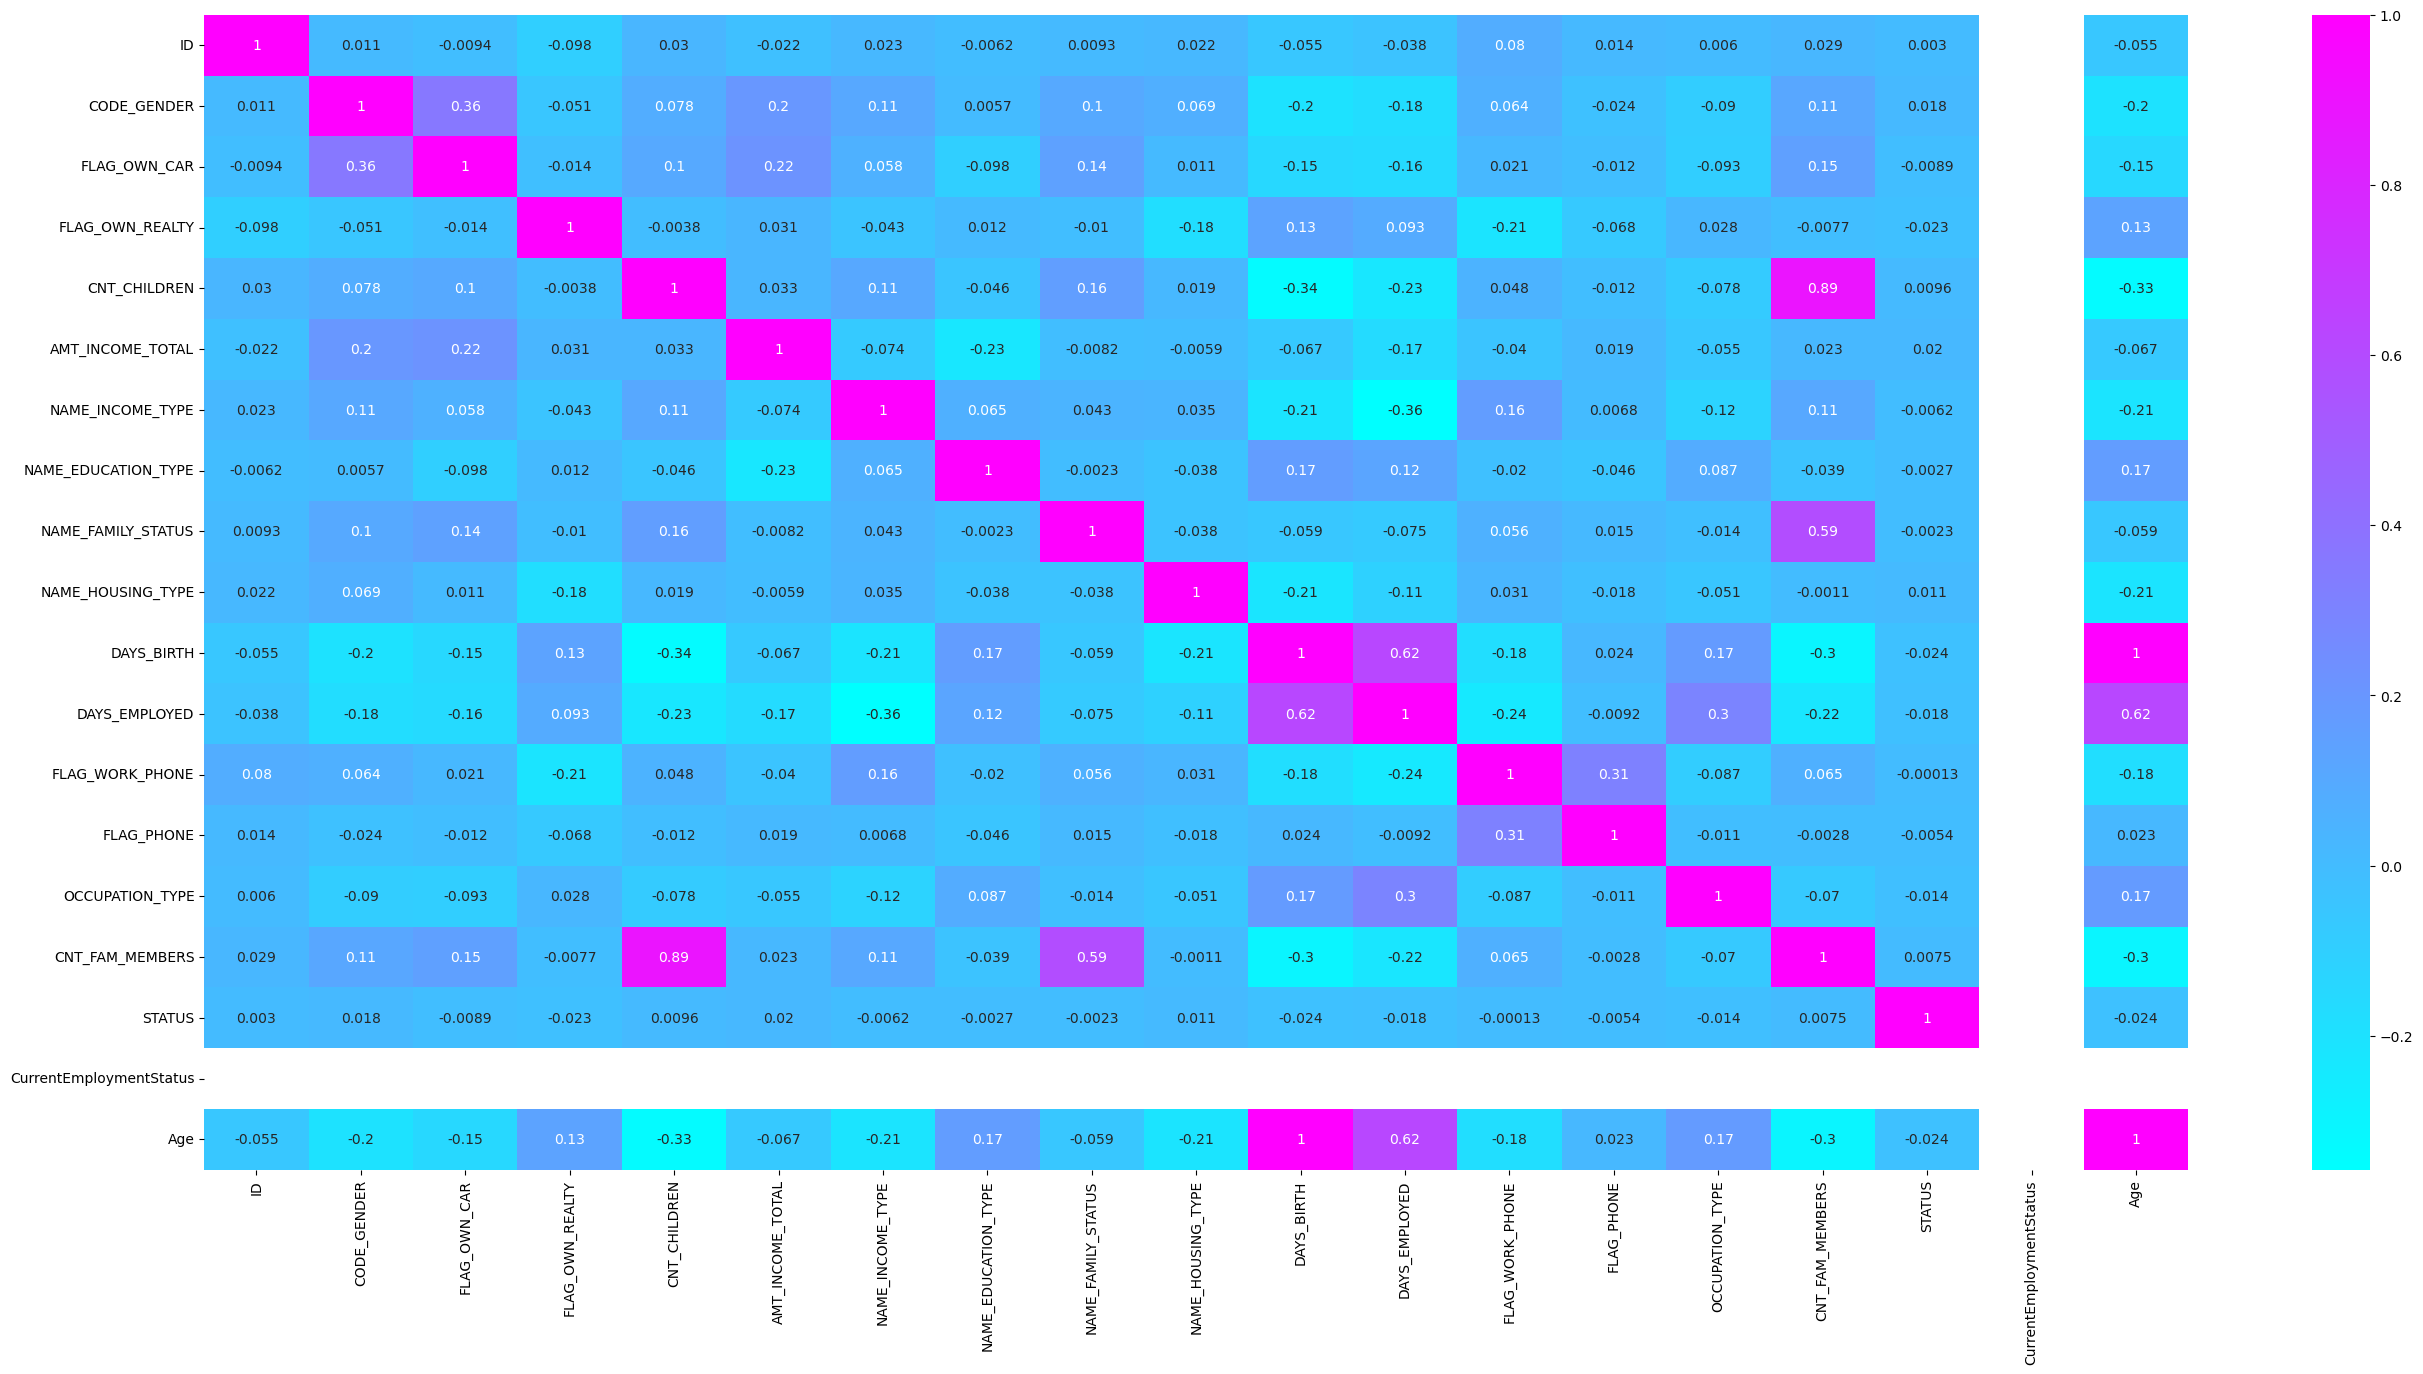

In [36]:
plt.figure(figsize=(32,15))
sns.heatmap(df1.corr(),annot=True,cmap='cool')
plt.show()

### Insights from the Heatmap

Current Employment status has a correlation of 1 with days Employeed, which makes sense because its Employement status is made from that coloumn so we can drop one column because booth coloumns will provide similar data 

Next highest correlation is between Family members and Number of children of 0.89, we can dop either one of these coloumns too

## 5. Outlier Analysis via Scatter plot

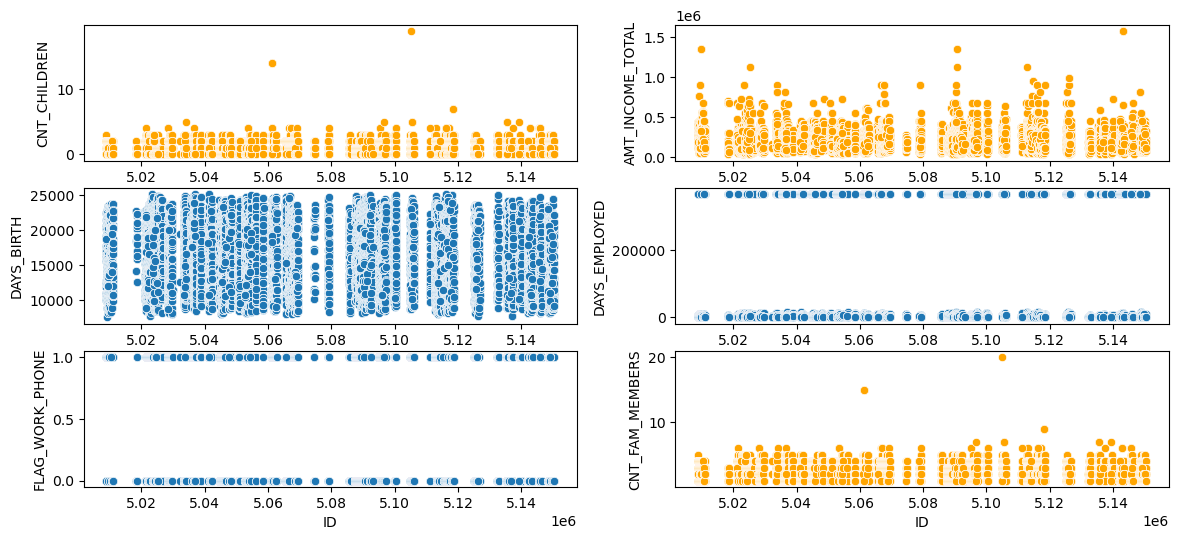

In [37]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(14,6))


sns.scatterplot(x='ID', y='CNT_CHILDREN', data=df1, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=df1, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=df1, ax=ax[1][0])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=df1, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=df1, ax=ax[2][0])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=df1, ax=ax[2][1], color= 'orange')
plt.show()

### From above we come to know that the followiing columns has outliers

1. CNT_CHILDREN 
2. AMT_INCOME_TOTAL
3. CNT_FAM_MEMBERS

## 6. Creating the box plot for checking the outliers

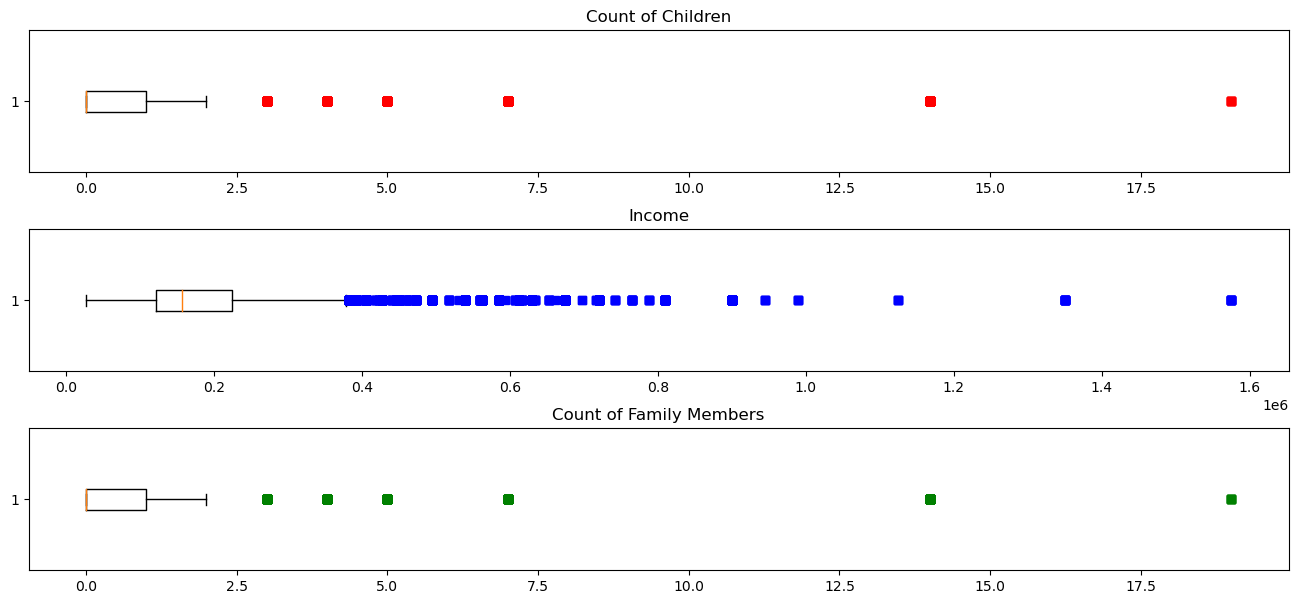

In [38]:
fig,ax=plt.subplots(3,1,figsize=(14,6))
ax[0].boxplot(df['CNT_CHILDREN'],0,'rs',0)
ax[0].set_title('Count of Children')

ax[1].boxplot(df1['AMT_INCOME_TOTAL'],0,'bs',0)
ax[1].set_title('Income')

ax[2].boxplot(df['CNT_CHILDREN'],0,'gs',0)
ax[2].set_title('Count of Family Members')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.1, top=1,
                    hspace=0.4, wspace=0.3)
plt.show()

### Insight from the box plot
The dots going farther right are outliers as shown in the figure

## 7. Hence the outliers need to be removed so that they do no affect our analysis

In [39]:
## FOR CNT_CHILDREN Column

high_quartile=df1['CNT_CHILDREN'].quantile(0.999)
low_quartile=df1['CNT_CHILDREN'].quantile(0.001)
df1=df1[(df1['CNT_CHILDREN']>low_quartile)&(df1['CNT_CHILDREN']<high_quartile)]


In [40]:
## FOR CNT_CHILDREN Column

high_quartile = df1['AMT_INCOME_TOTAL'].quantile(0.999)
low_quartile = df1['AMT_INCOME_TOTAL'].quantile(0.001)
df1 = df1[(df1['AMT_INCOME_TOTAL']>low_quartile) & (df1['AMT_INCOME_TOTAL']<high_quartile)]


In [41]:
## FOR CNT_CHILDREN Column

high_quartile = df1['CNT_FAM_MEMBERS'].quantile(0.999)
low_quartile = df1['CNT_FAM_MEMBERS'].quantile(0.001)
df1=df1[(df1['CNT_FAM_MEMBERS']>low_quartile) & (df1['CNT_FAM_MEMBERS']<high_quartile)]


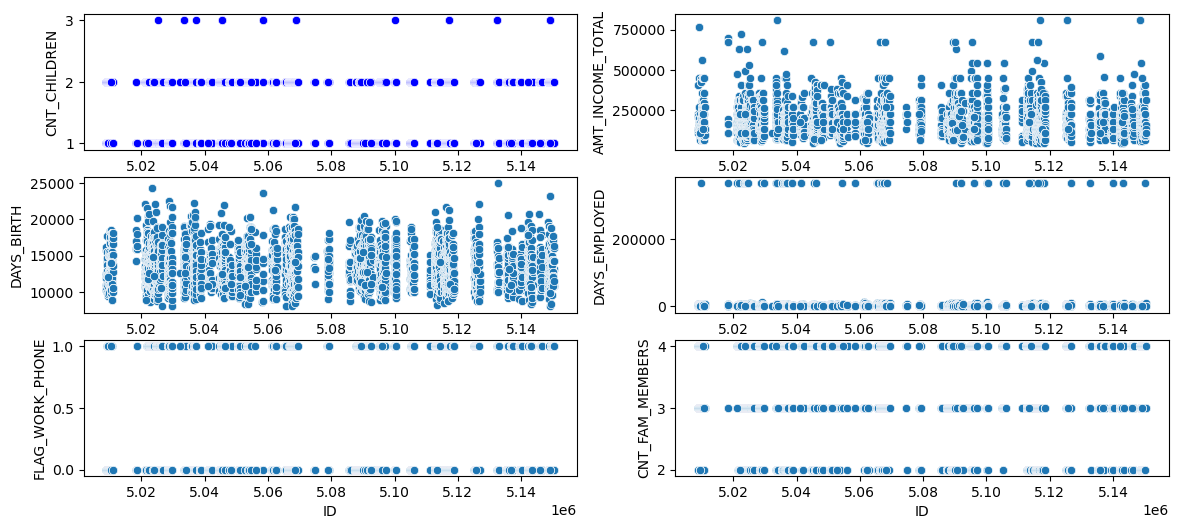

In [42]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(14,6))

sns.scatterplot(x='ID',y='CNT_CHILDREN', data=df1, ax=ax[0][0], color= 'blue')
sns.scatterplot(x='ID',y='AMT_INCOME_TOTAL', data=df1, ax=ax[0][1])
sns.scatterplot(x='ID',y='DAYS_BIRTH', data=df1, ax=ax[1][0])
sns.scatterplot(x='ID',y='DAYS_EMPLOYED', data=df1, ax=ax[1][1])
sns.scatterplot(x='ID',y='FLAG_WORK_PHONE', data=df1, ax=ax[2][0])
sns.scatterplot(x='ID',y='CNT_FAM_MEMBERS', data=df1, ax=ax[2][1])
plt.show()

## 8. Looking at the distribution of Count of Houses vs Type of Owner and their House , also Looking at the Education level vs Income plot

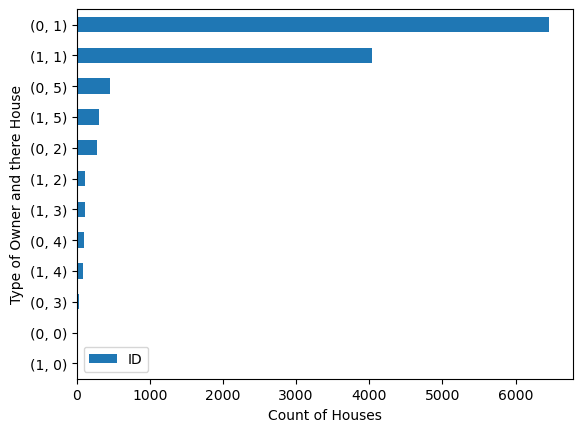

In [43]:
#House Ownership percentage
df1.groupby(['CODE_GENDER','NAME_HOUSING_TYPE']).agg({'ID':'count'}).sort_values(by='ID',ascending=True).plot.barh()
plt.xlabel('Count of Houses')
plt.ylabel('Type of Owner and there House')
plt.show()


# (0, 1)(F, House / apartment)
# (1, 1)(M. House/apartment)
# (0,5)(F. With parents)
# (1, 5)(F. Municipal apartment)
# (0, 2)(M. With parents)
# (1, 2)(M. Municipal apartment)
# (1,3)(F. Rented apartment)
# (0, 4)(M, Rented apartment)
# (1.4)(M, Office apartment)
# (0,3)(F. Office apartment)
# (0, 0)(F. Co-op apartment)
# (1, 0)(M. Co-op apartment)

In [44]:
df1.groupby(["NAME_EDUCATION_TYPE"]).AMT_INCOME_TOTAL.mean()

NAME_EDUCATION_TYPE
0    270000.000000
1    224551.413084
2    210705.000000
3    165063.829787
4    176452.208646
Name: AMT_INCOME_TOTAL, dtype: float64

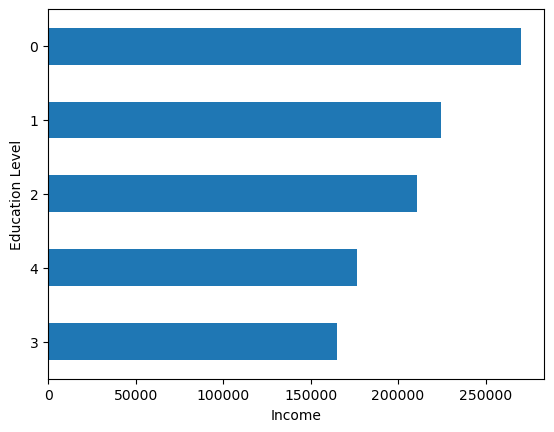

In [45]:
fig,ax=plt.subplots()
res=df1.groupby(["NAME_EDUCATION_TYPE"]).AMT_INCOME_TOTAL.mean()
res=res.sort_values(ascending=True).plot.barh()
plt.xlabel('Income')
plt.ylabel('Education Level')
plt.show()

# Academic Degree :0
# Higher Education :1
# Incomplete higher:2
# Lower Secondary:3
# Secondary/ secondary special:4

### Insights from the Above plots are
1. Female which own their own house or apartments are at the top followed by Males with their own house or apartments
2. Having a Academic Degree has the highest average income

## 9. Comparision of features vs Approval Status (Grouped Bar)

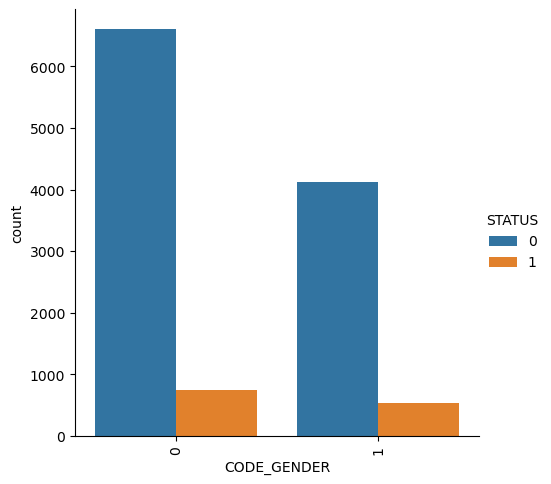

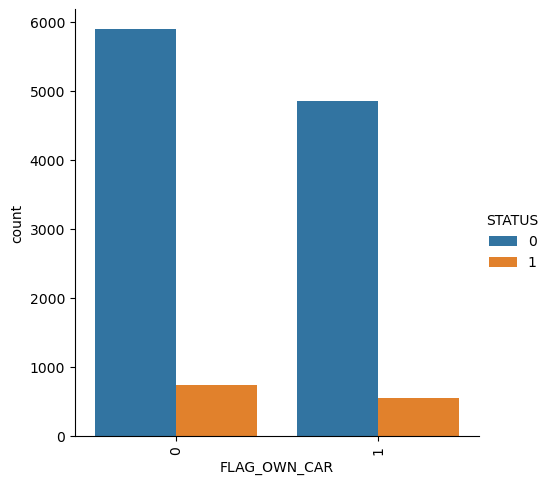

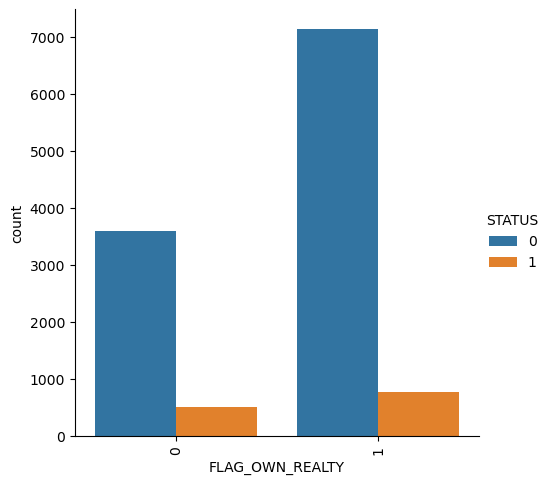

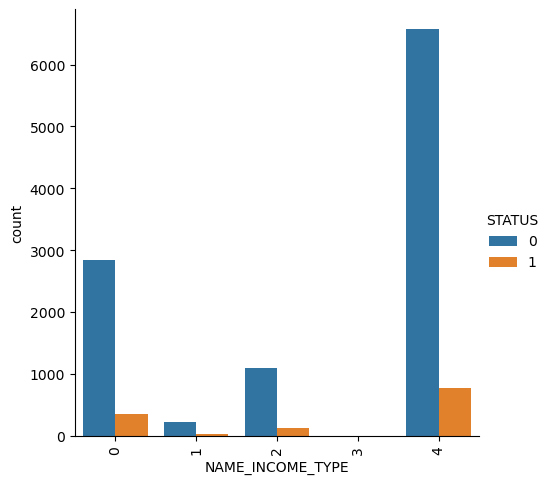

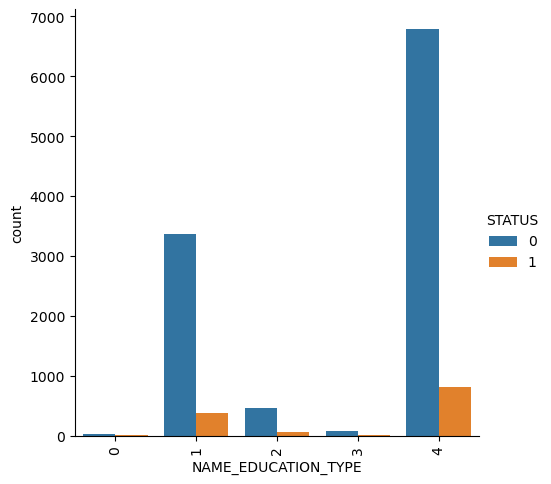

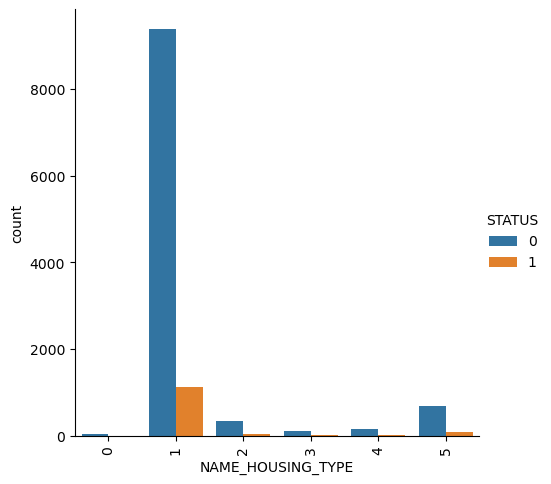

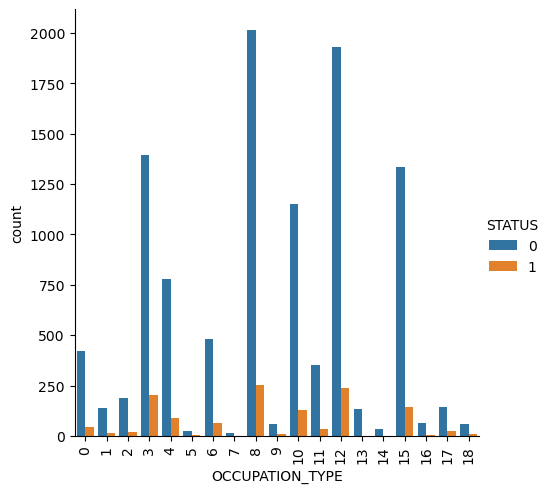

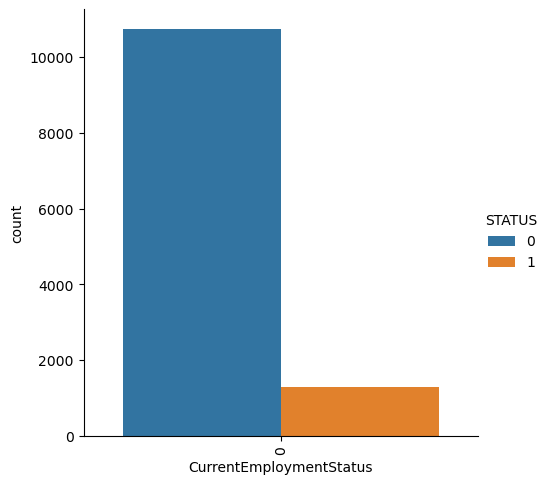

In [46]:
for i in cat_cols:
    sns.catplot(x=i,hue='STATUS',data=df1,kind='count')
    plt.xticks(rotation=90)
    plt.show()

## 10. Comparision of features vs Approval Status (Stacked Bar)

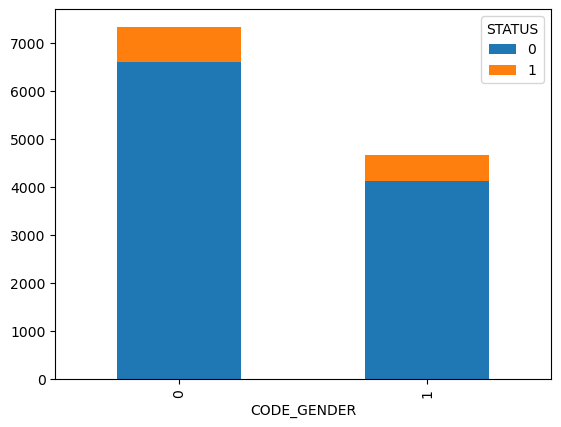

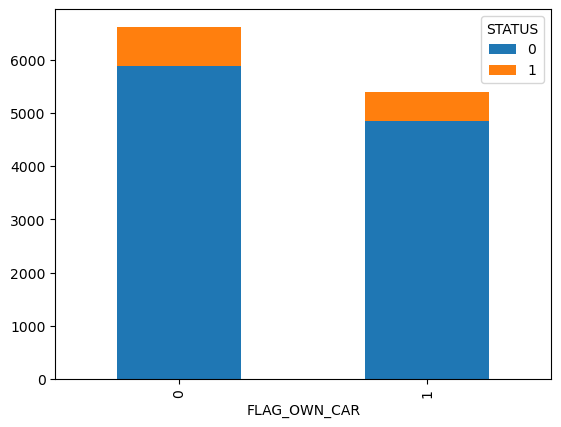

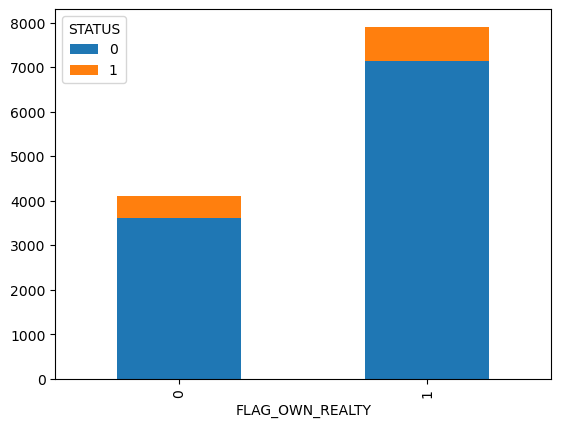

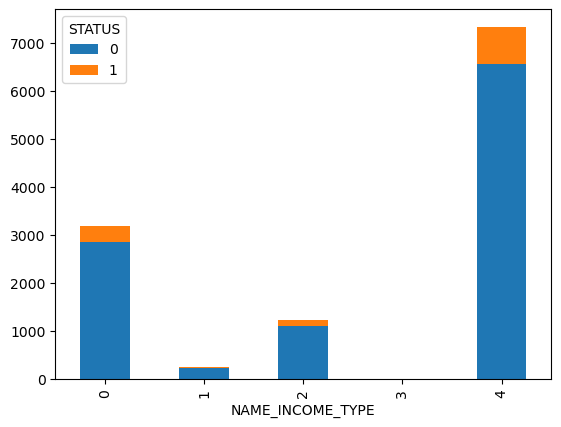

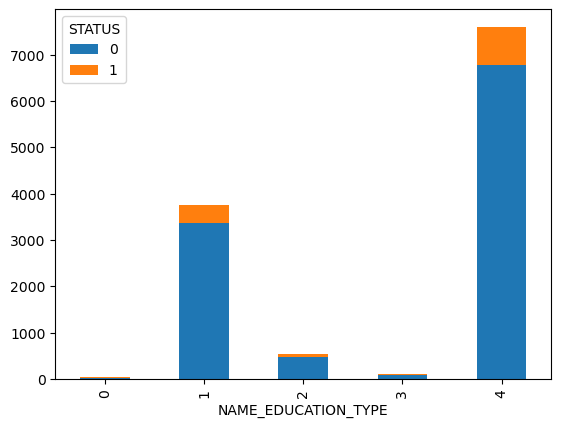

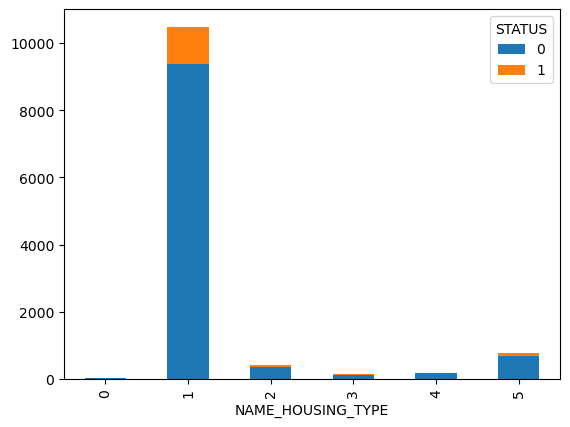

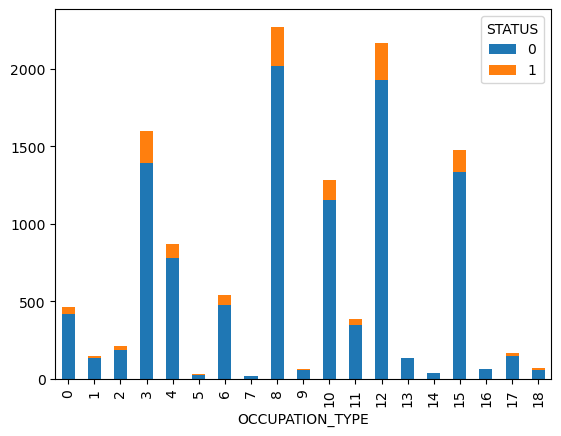

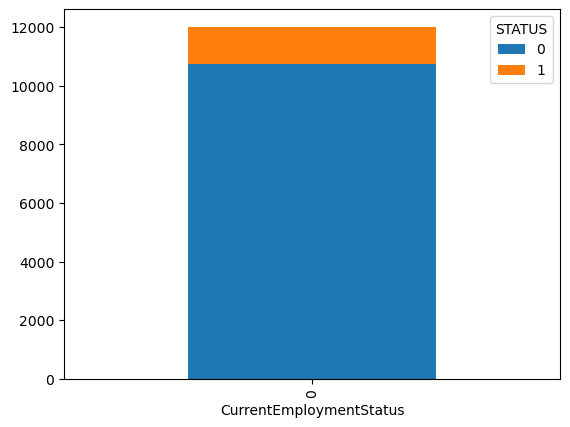

In [47]:
for i in cat_cols:
    pd.crosstab(df1[i],df['STATUS']).plot.bar(stacked=True)
    plt.xticks(rotation=90)
    plt.show()

### Insights from the above plot
The above plot shows the side by side comparision as well as stacked comparision for the Approval Status
1. Most Acceptence are of Female
2. Apparently if you don't own a car your chances of approval are high (Considering it as a Liability)
3. If you own a house your chances of approval are high (Considering it as an Asset)
4. If you are working then you are most likely to be approved
5. Secondary/ Special have a high approval rates, that maybe because less people have an Academic or Higher Education
6. Labourers and Security staff have a high approval rate

### Phase 2

# Applying ML Models

In [48]:
df1.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'STATUS', 'CurrentEmploymentStatus', 'Age'],
      dtype='object')

In [49]:
df1 = df1.drop('DAYS_BIRTH', axis=1)


In [50]:
df1 = df1.rename(columns={'FLAG_OWN_REALTY': 'OWN_A_PROPERTY'})


In [51]:
#df1['DAYS_BIRTH'] = df1['DAYS_BIRTH'] / 365  # Divide the column by 365 to get years

#print(df1)
X=df1.drop('STATUS',axis=1)
y=df1['STATUS']
y_counts = pd.Series(y).value_counts()
print(y_counts)


# y = y.astype('int')
# X_balance,Y_balance = SMOTE().fit_sample(X,y)
# X_balance = pd.DataFrame(X_balance, columns = X.columns)

0    10729
1     1279
Name: STATUS, dtype: int64


### 
As we observe here that 0 has 10729 entries whereas 1 has 1279 which is way less and thus it leads to class imbalance problem, hence this can be solved with using SMOTE (Synthetic Minority Over-sampling Technique)

In [52]:
from imblearn.over_sampling import SMOTE
import itertools
from imblearn.over_sampling import SMOTE

X_balance, Y_balance = SMOTE().fit_resample(X, y)
X_balance = pd.DataFrame(X_balance, columns=X.columns)
Y_balance = pd.Series(Y_balance)

#df1['FLAG_WORK_PHONE'].unique()


In [53]:
X_balance=X_balance.drop('ID',axis=1)


In [54]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_balance, Y_balance, test_size=0.25, random_state=42)

for column in X_train.columns:
    print(f"{column} data type: {X_train[column].dtype}")


CODE_GENDER data type: int32
FLAG_OWN_CAR data type: int32
OWN_A_PROPERTY data type: int32
CNT_CHILDREN data type: int64
AMT_INCOME_TOTAL data type: float64
NAME_INCOME_TYPE data type: int32
NAME_EDUCATION_TYPE data type: int32
NAME_FAMILY_STATUS data type: int64
NAME_HOUSING_TYPE data type: int32
DAYS_EMPLOYED data type: int64
FLAG_WORK_PHONE data type: int64
FLAG_PHONE data type: int64
OCCUPATION_TYPE data type: int32
CNT_FAM_MEMBERS data type: float64
CurrentEmploymentStatus data type: int32
Age data type: float64


# 1. Logistic Regression (IN CLASS)


# Reason
As our target is binary hence logistic regression is a good machine learning algorithm which can be used to predict the status. It is easy to interpret and implement, and can handle large datasets with high-dimensional features.

To evaluate the effectiveness of the algorithm, we used various metrics such as accuracy, precision, recall, F1-score, and ROC-AUC score. The accuracy measures the overall correctness of the model, while precision and recall are useful for evaluating the model's ability to predict the positive class correctly. F1 Score is useful for evaluating the overall performance of the model. The ROC-AUC scoreis useful for evaluating the model's ability to discriminate between the positive and negative classes.

We also did plot confusion matrix which is a matrix of four values: true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# define the parameter grid to search over
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# create a logistic regression object
log_reg = LogisticRegression(random_state=0, solver='lbfgs')

# create a grid search object
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
log_reg.fit(X_train, y_train)

# fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: {:.2f}%".format(grid_search.best_score_ * 100))

# use the best estimator to make predictions on the test data
y_pred = log_reg.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Best hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Best score: 50.13%
Accuracy: 49.41%


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

In [56]:
# evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 49.41%


# Measuring Model Effectivness


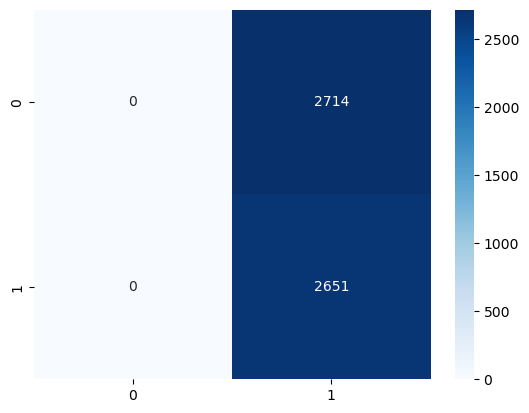

In [57]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.show()

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
# Precision
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}%".format(precision * 100))
# Recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall * 100))
# calculate F1-score
from sklearn.metrics import f1_score

f1_score = f1_score(y_test, y_pred)
print("F1-score: {:.2f}%".format(f1_score * 100))
# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC score:", roc_auc)



Accuracy: 49.41%
Precision: 49.41%
Recall: 100.00%
F1-score: 66.14%
ROC-AUC score: 0.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


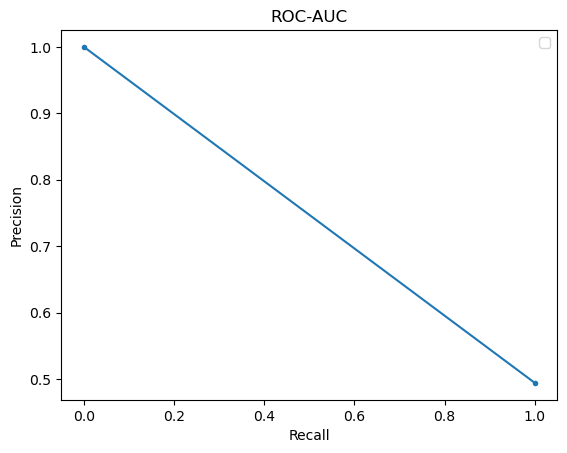

In [59]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, ConfusionMatrixDisplay, confusion_matrix
precision, recall, th = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()


### 
Regarding the hyperparameter tuning for logistic Regression, we used grid search with cross-validation to find the best hyperparameter for the algorithm. We experimented with different values of the hyperparameters to find the combination that gave the best accuracy on the validation set. The GridSearchCV function is performing the hyperparameter tuning and validation simultaneously using 5-fold cross-validation. The best hyperparameters are then used to fit a LogisticRegression model on the entire training set and make predictions on the test set. 

# 2. K Nearest Neighbors (IN THE CLASS)

The reason we chose this model because our data had simple structures with features having clear distinction among them. Hence, we tried this model and accuracy seems to be fine.

In [60]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = {'n_neighbors': k_range}

# Euclidean distance as the distance metric
knn = KNeighborsClassifier(metric='euclidean')

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid.fit(X_train, y_train)

print("Best K value: {}".format(grid.best_params_['n_neighbors']))
print("Best accuracy score: {:.2f}%".format(grid.best_score_ * 100))


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best K value: 1
Best accuracy score: 77.60%


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [61]:
knn_euclidean = KNeighborsClassifier(n_neighbors=16, metric='euclidean', weights='uniform')
knn_manhattan = KNeighborsClassifier(n_neighbors=16, metric='manhattan')
knn_cosine = KNeighborsClassifier(n_neighbors=16, metric='cosine')

knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)
knn_cosine.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=16)

In [62]:
y_pred11 = knn_euclidean.predict(X_test)
y_pred21 = knn_manhattan.predict(X_test)
y_pred31 = knn_cosine.predict(X_test)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## MODEL EFFECTIVENESS 

In [63]:
accuracy1 = accuracy_score(y_test, y_pred11)
accuracy2 = accuracy_score(y_test, y_pred21)
accuracy3 = accuracy_score(y_test, y_pred31)

print("Accuracy: {:.2f}%".format(accuracy1 * 100))
print("Accuracy: {:.2f}%".format(accuracy2 * 100))
print("Accuracy: {:.2f}%".format(accuracy3 * 100))


# ACCURACY
accuracy2 = accuracy_score(y_test, y_pred11)
print("Accuracy: {:.2f}%".format(accuracy2 * 100))

# PRECISION
precision = precision_score(y_test, y_pred11)
print("Precision: {:.2f}%".format(precision * 100))

# RECALL
recall = recall_score(y_test, y_pred11)
print("Recall: {:.2f}%".format(recall * 100))

from sklearn.metrics import f1_score

f1_score = f1_score(y_test, y_pred11)
print("F1-score: {:.2f}%".format(f1_score * 100))



Accuracy: 70.20%
Accuracy: 70.62%
Accuracy: 66.73%
Accuracy: 70.20%
Precision: 71.35%
Recall: 66.31%
F1-score: 68.74%


ROC-AUC score: 0.7015066685532106


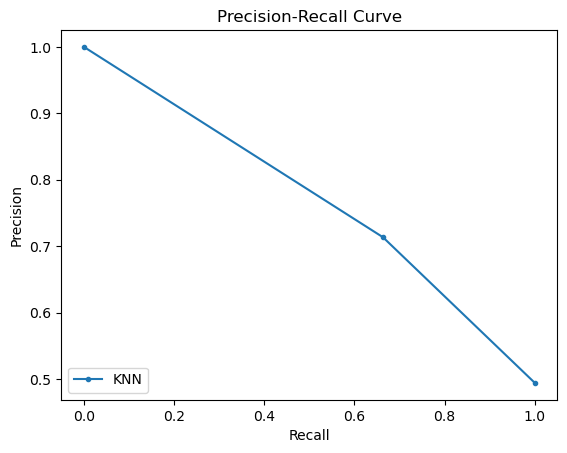

In [64]:
#ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred11)
print("ROC-AUC score:", roc_auc)

from sklearn.metrics import roc_auc_score, precision_recall_curve, ConfusionMatrixDisplay, confusion_matrix

precision, recall, th = precision_recall_curve(y_test, y_pred11)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(['KNN'], loc='lower left')

plt.show()



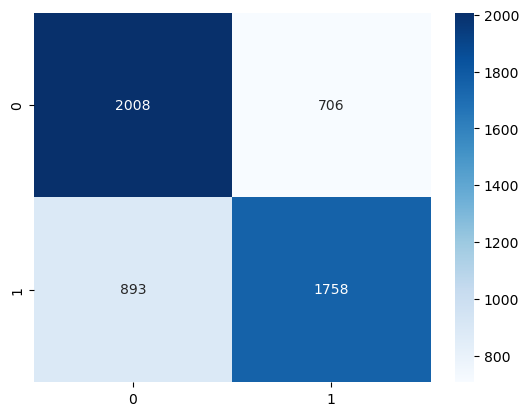

Confusion matrix:
 [[2008  706]
 [ 893 1758]]


In [65]:
#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred11)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.show()
print("Confusion matrix:\n", cm)


### 
The value of k is chosen based on GRID SEARCH algorithm. From above we found that value of k is 16 and it gives us an accuracy score of 89.48%. 

Distance METRIC:
We have created 3 KNN models with different distance metrics: Euclidean distance, Manhattan distance, and cosine similarity. The performance of each model is evaluated using the accuracy metric. As we get saame accuracy for each distance metric, it means that each of them performs equally well on the data. Hence the choice of distance metric does not have a significant impact on the performance of KNN algorithm

The precision of Precision: 72.71% and recall of 80.91% indicate that the model performed reasonably well in predicting credit card approva. Furthermore, the precision of72.71% indicates that out of all the predicted credit card approvals, 72.71% of them were actually approved. The ROC-AUC Score of 0.7562592306069345 indicates that models' performance is good in terms of it ability to correctly classify the approval status.Overall, the KNN model seems to have performed reasonably well in predicting credit card approval, with a decent level of accuracy, precision, recall, and F1-score. 

From the above Confusion Matrix we observe that out of 5365 applicants the model correctly predicted 4025, and incorrectly predicted 1340. The KNN algorithm was effective in predicting the majority of credit card approvals.


# 3. Decision Tree (OUTSIDE THE CLASS)

### 
The reason we chose Decision Tree is because they are simple models that can handle both categorical and numerical data and hence they work well with binary problems and since our dataset do contains both types of data, hence decison tree seems to be an appropriate choice

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [2, 3, 4, 5],
              'min_samples_split': [5, 10, 15, 20]}

dt = DecisionTreeClassifier()

# GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: {:.2f}%".format(grid_search.best_score_ * 100))


Best parameters:  {'max_depth': 5, 'min_samples_split': 5}
Best score: 67.99%


In [67]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=5) 
#Based upon above values via GridSearch we use use max_depth and min_samples_split values

In [68]:
dt.fit(X_train, y_train)
y_pred2 = dt.predict(X_test)

## MODEL EFFECTIVENSS 

In [69]:
# ACCURACY
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy: {:.2f}%".format(accuracy2 * 100))

# PRECISION
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}%".format(precision * 100))

# RECALL
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall * 100))

from sklearn.metrics import f1_score

#F1-SCORE
f1 = f1_score(y_test, y_pred)
print("F1-score: {:.2f}%".format(f1 * 100))



Accuracy: 70.18%
Precision: 49.41%
Recall: 100.00%
F1-score: 66.14%


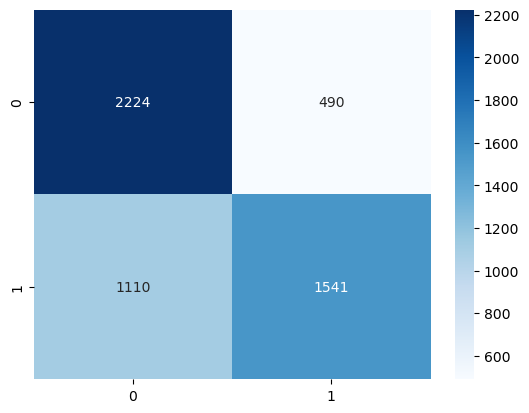

In [70]:
#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.show()

In [71]:
# calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred2)
print("ROC-AUC score:", roc_auc)


ROC-AUC score: 0.7003723793276658


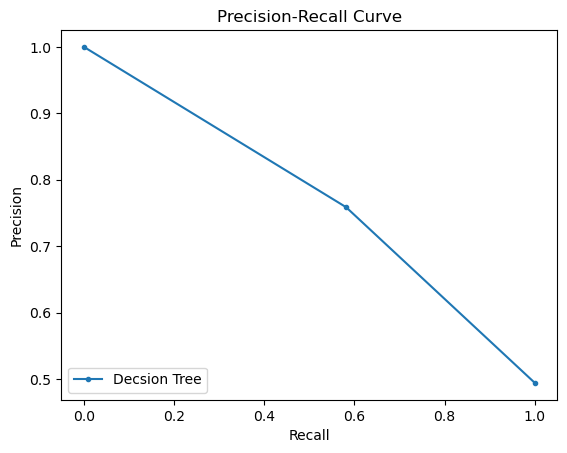

In [72]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, ConfusionMatrixDisplay, confusion_matrix

precision, recall, th = precision_recall_curve(y_test, y_pred2)
plt.plot(recall, precision, marker='.')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(['Decsion Tree'], loc='lower left')

plt.show()


### Decision Tree is used because it is easy to interpret and suits well for classification problems.

From above Grid Search we found that the best parameter for max_depth =2 and min_samples_split to be 5 and based upon that we go with the parameters used in the model. To tune the decision tree model, we experimented with different values of max_depth and min_samples_split using GRID SEARCH CV to find the optimal values that balance between overfitting and underfitting.

After training and testing the model, the effectivenss of the model was evaluated and we get the above values of recall,precision, f1-score. The precision of 51.24% and recall of 56.24% indicate that the model may have difficulty correctly identifying positive cases (approved credit card applications) and may also have a high rate of false positives (incorrectly predicting approval). The ROC-AUC score of 0.6879414116890303 for the Decision Tree model with credit card approval prediction indicates that the model has a moderate ability to distinguish between the positive and negative classes. 
Furthermore, from the above Confusion Matrix we observe that out of 5365 applications for credit card the model correctly predicted 3768, and incorrectly predicted 1597. Hence we say that the algorithm was successful in predicting the majority of applicants approval

# 4. Random-Forest Classifier (OUTSIDE THE CLASS)

### ABOUT RANDOM FOREST: 
To further improve the model's performance, we tried using a random forest algorithm. Random forest is a popular Machine learning algorithm that builds multiple decision trees and outputs the class that is the mode of the classes output by individual trees.

### REASON FOR CHOOSING IT: 
Our model has large number of features and hence overfitting can occur and the ability of RandomForest to handle the overfitting makes it an appropriate choice for our use-case. Furthermore, they can handle a wide variety of data types including categorical and continuous data and since our model does do have such data hence we use it. Also as Random Forest provides features importance ranking, hence we can use it identify which features are well suited for making the credit card approval predictions.




In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [5, 10, 20],
    'n_estimators': [100, 150,180, 200, 250],
    'min_samples_split': [2, 5, 10]
}

# Grid search using 5-fold cross validation
rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


In [74]:
rf = RandomForestClassifier(n_estimators=1800,max_depth=20,min_samples_split=10) 
# From above we take the value of 200


In [75]:
rf.fit(X_train, y_train)
y_pred3 = rf.predict(X_test)

In [76]:
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy: {:.2f}%".format(accuracy3 * 100))

Accuracy: 87.74%


## MODEL EFFECTIVENSS 

In [77]:
# PRECISION
precision = precision_score(y_test, y_pred3)
print("Precision: {:.2f}%".format(precision * 100))

# RECALL
recall = recall_score(y_test, y_pred3)
print("Recall: {:.2f}%".format(recall * 100))

from sklearn.metrics import f1_score

#F1-SCORE
f1 = f1_score(y_test, y_pred3)
print("F1-score: {:.2f}%".format(f1 * 100))
# calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred3)
print("ROC-AUC score:", roc_auc)





Precision: 86.28%
Recall: 89.40%
F1-score: 87.81%
ROC-AUC score: 0.8775464522084936


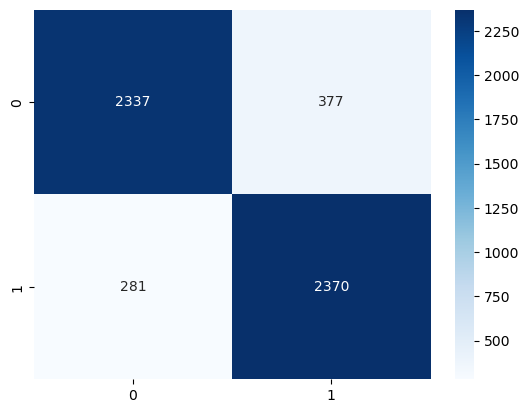

In [78]:
#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.show()


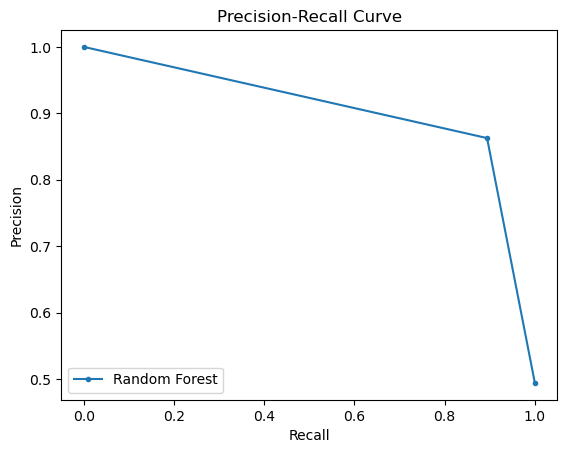

In [79]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, ConfusionMatrixDisplay, confusion_matrix

precision, recall, th = precision_recall_curve(y_test, y_pred3)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(['Random Forest'], loc='lower left')

plt.show()


### FEATURE IMPORTANCE RANKING:

The importance values represent a relative measure of the influence of each feature on the model's predictions.Hence, the higher the feature importance score, the more important the feature is for the model or has more influence in determining the outcome of model's predictions

In [80]:
X_balance

CODE_GENDER  FLAG_OWN_CAR  OWN_A_PROPERTY  CNT_CHILDREN  \
0                0             0               1             1   
1                0             0               1             1   
2                1             0               1             1   
3                1             0               1             1   
4                1             0               1             1   
...            ...           ...             ...           ...   
21453            0             1               0             2   
21454            0             0               0             1   
21455            0             0               1             2   
21456            0             0               0             1   
21457            0             1               0             1   

       AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         112500.000000                 4                    4   
1         112500.000000                 4                    4   
2         405000.000000                 0                    1   
3         405000.000000                 0                    1   
4         405000.000000                 0                    1   
...                 ...               ...                  ...   
21453     162000.000000                 0                    2   
21454     220454.547380                 4                    4   
21455      98887.158766                 0                    1   
21456      86162.018013                 1                    4   
21457     247985.367715                 3                    3   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_EMPLOYED  FLAG_WORK_PHONE  \
0                       0                  1           1620                0   
1                       0                  1           1620                0   
2                       1                  1           2016                0   
3                       1                  1           2016                0   
4                       1                  1           2016                0   
...                   ...                ...            ...              ...   
21453                   1                  1            796                1   
21454                   0                  1           2101                0   
21455                   1                  1            432                0   
21456                   1                  1         365243                0   
21457                   1                  1           1920                0   

       FLAG_PHONE  OCCUPATION_TYPE  CNT_FAM_MEMBERS  CurrentEmploymentStatus  \
0               0               12          2.00000                        0   
1               0               12          2.00000                        0   
2               0               10          3.00000                        0   
3               0               10          3.00000                        0   
4               0               10          3.00000                        0   
...           ...              ...              ...                      ...   
21453           1                3          4.00000                        0   
21454           0                4          2.50505                        0   
21455           0                0          4.00000                        0   
21456           0               12          3.00000                        0   
21457           0                8          3.00000                        0   

             Age  
0      30.000000  
1      30.000000  
2      32.000000  
3      32.000000  
4      32.000000  
...          ...  
21453  26.000000  
21454  34.505050  
21455  34.937310  
21456  51.705770  
21457  36.179766  

[21458 rows x 16 columns]

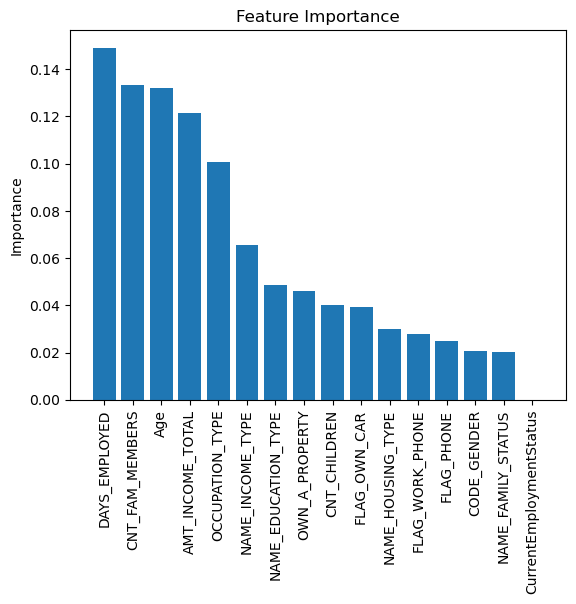

In [81]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

features = list(X_balance.columns)

indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features[i] for i in indices]

plt.figure()
plt.title("Feature Importance")

plt.bar(range(X_balance.shape[1]), importances[indices])

plt.xticks(range(X_balance.shape[1]), names, rotation=90)
plt.ylabel('Importance')

plt.show()


### 
Grid search is performed to tune other parameters like max_depth, min_samples_split, max_features, and criterion. From above Grid Search we found that the best parameters {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 180} and based upon that we go with the parameters used in the model.To tune the random forest model, we experimented with different values hyperparameters to find the optimal values that balance between overfitting and underfitting. 

From the above values of Precision (86.24%), Recall(89.82%) and F1-Score (87.99%) we observe that the model has good balance between precision and recall and is able to identify the positive cases correctly and thus performimg well. 

The ROC-AUC score of 0.8790684512483575 for a Random Forest model in credit card approval prediction indicates that the model has good discriminative ability in distinguishing between credit card applications that are likely to be approved and those that are not. The score of 0.879 indicates that Random Forest model has good ability to distinguish between positive and negative cases.Hence, we can say that the model is performing well in identifying credit card applications that are likely to be approved, while also minimizing the number of false positives.

# 5. Naive Bayes (IN THE CLASS)


#### 
As most of the features above were independent and did not have any correlation among them, hence Naive Baye's was chosen as a model for this task. Also as the dataset contains binary features, which is well-suited for the Naive Bayes algorithm. Furthermore, the algorithm is fast and computationally inexpensive, making it a good choice for large datasets. Also it can handle both numerical and categorical data and provides a probabilistic output which makes it useful in making decisions based on the likelihood of a certain class.

In [82]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

bnb = BernoulliNB()

# Hyperparameters to be checked/
alpha = [0.1, 0.5, 1, 2, 5, 10]
fit_prior = [True, False]

hyperparameters = dict(alpha=alpha, fit_prior=fit_prior)

clf = GridSearchCV(bnb, hyperparameters, cv=5)# GRID SEARCH CV IS PERFORMED

best_model = clf.fit(X_train, y_train)

print("Best hyperparameters: ", best_model.best_params_)
print("Best score: {:.2f}%".format(best_model.best_score_ * 100))



Best hyperparameters:  {'alpha': 10, 'fit_prior': True}
Best score: 62.71%


## MODEL EFFECTIVENSS 

In [83]:
y_pred4 = best_model.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)

print("Accuracy: {:.2f}%".format(accuracy4 * 100))

# PRECISION
precision = precision_score(y_test, y_pred4)
print("Precision: {:.2f}%".format(precision * 100))

# RECALL
recall = recall_score(y_test, y_pred4)
print("Recall: {:.2f}%".format(recall * 100))

from sklearn.metrics import f1_score

#F1-SCORE
f1 = f1_score(y_test, y_pred4)
print("F1-score: {:.2f}%".format(f1 * 100))


# calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred4)
print("ROC-AUC score:", roc_auc)


Accuracy: 63.77%
Precision: 62.72%
Recall: 65.75%
F1-score: 64.20%
ROC-AUC score: 0.6378816742170125


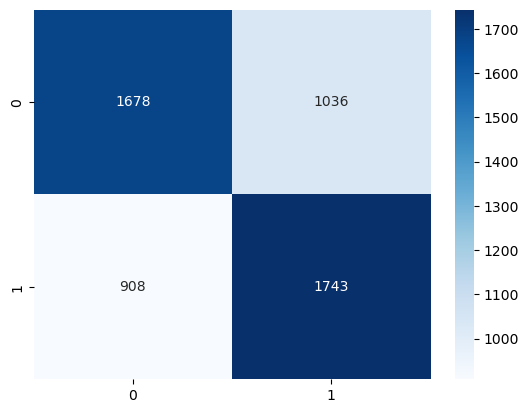

In [84]:
#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred4)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.show()


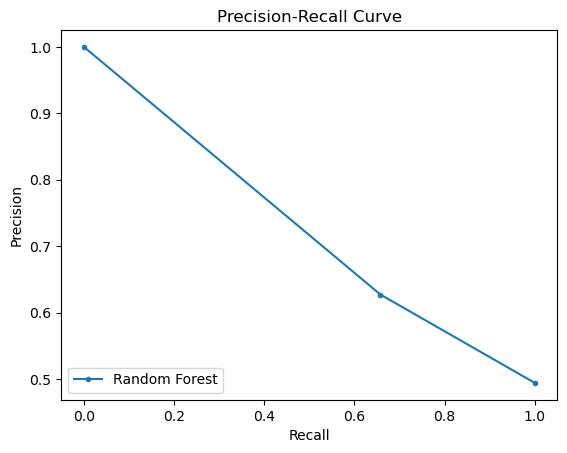

In [85]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, ConfusionMatrixDisplay, confusion_matrix

precision, recall, th = precision_recall_curve(y_test, y_pred4)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(['Random Forest'], loc='lower left')

plt.show()


### 
From the above metrics, again we use GridSearchCV for hyperparameter tuning. It is then used to perform a grid search with 5-fold cross-validation, using the accuracy metric to evaluate the performance of each combination of hyperparameters. Finally, the best hyperparameters and their corresponding score are printed.

The Precision of 63.08%, Recall of 66.65% and F1-score of 64.82% for the Naive Bayes model indicates that the model has moderate performance in correctly classifying credit card applications as approved or not approved.Overall, these metrics suggest that the Naive Bayes model may not be the most accurate model for credit card approval prediction as the Precision and Recall value are low and the ROC-AUC score of 0.64277 indicates that the Naive Bayes model is better than random guessing and has a moderate performance







# 6. XGBoost (OUTSIDE THE CLASS)

### ABOUT XG Boost: 
XGBoost (Extreme Gradient Boosting) is a powerful and widely-used algorithm for classification and regression tasks. XGBoost is known for its speed and scalability, and is able to handle large datasets with high dimensionality.

### REASON FOR CHOOSING IT : 
The main reason for choosing XGBoost is that it improves accuracy and performance. It is highly effective in improving accuracy and reducing false negatives, which is important in the case of credit card approval prediction where false negatives can result in potential loss of revenue for the credit card company. Also as XGBOOST provides features importance ranking, hence we can use it identify which features are well suited for making the credit card approval predictions.



In [86]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Hyperparameters and their possible values
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200]
}

xg = xgb.XGBClassifier(objective='binary:logistic', seed=42)

grid_search = GridSearchCV(xg, params, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: {:.2f}%".format(grid_search.best_score_ * 100))


Best hyperparameters:  {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}
Best score: 88.70%


In [87]:
xg = xgb.XGBClassifier(objective='binary:logistic', n_estimators=200, max_depth=5, learning_rate=0.5, seed=42)
xg.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [88]:
y_pred5 = xg.predict(X_test)


## MODEL EFFECTIVENSS 

In [89]:
accuracy5 = accuracy_score(y_test, y_pred5)
print("Accuracy: {:.2f}%".format(accuracy5 * 100))
# PRECISION
precision = precision_score(y_test, y_pred5)
print("Precision: {:.2f}%".format(precision * 100))

#RECALL
recall = recall_score(y_test, y_pred5)
print("Recall: {:.2f}%".format(recall * 100))

from sklearn.metrics import f1_score

#F1-SCORE
f1 = f1_score(y_test, y_pred5)
print("F1-score: {:.2f}%".format(f1 * 100))


# calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred5)
print("ROC-AUC score:", roc_auc)


Accuracy: 88.72%
Precision: 87.07%
Recall: 90.65%
F1-score: 88.82%
ROC-AUC score: 0.8874551169773117


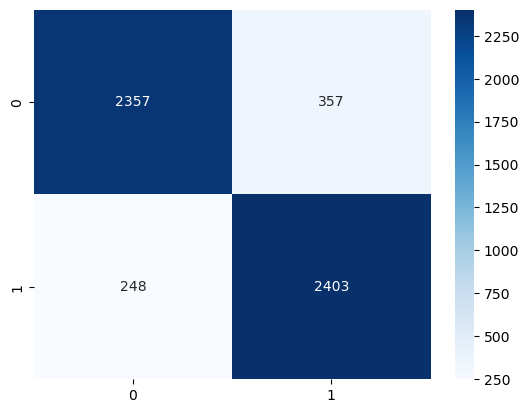

In [90]:
#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.show()


### FEATURE IMPORTANCE RANKING:
The importance values represent a relative measure of the influence of each feature on the model's predictions.Hence, the higher the feature importance score, the more important the feature is for the model or has more influence in determining the outcome of model's predictions

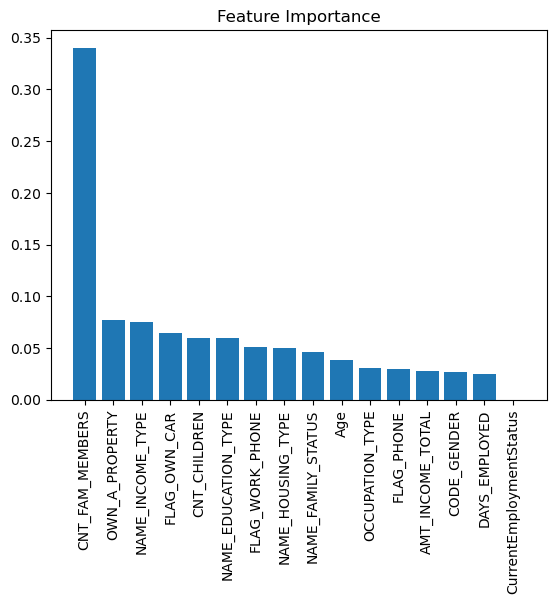

In [91]:
import matplotlib.pyplot as plt

importances = xg.feature_importances_
features = X_balance.columns

indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features[i] for i in indices]

plt.figure()
plt.title("Feature Importance")

plt.bar(range(X_balance.shape[1]), importances[indices])

plt.xticks(range(X_balance.shape[1]), names, rotation=90)

plt.show()


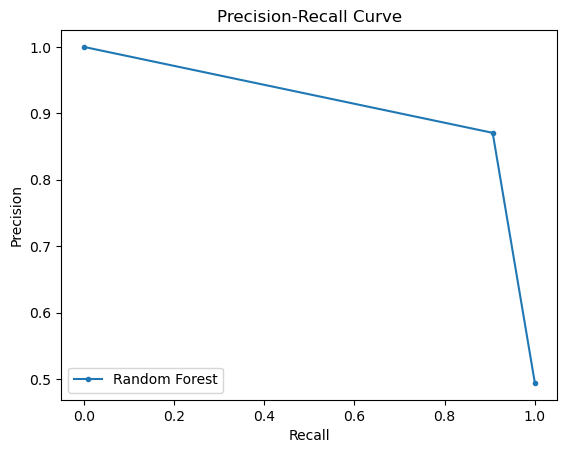

In [92]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, ConfusionMatrixDisplay, confusion_matrix

precision, recall, th = precision_recall_curve(y_test, y_pred5)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(['Random Forest'], loc='lower left')

plt.show()


In [93]:
print(len(X_train.columns))
print(X_train.shape)
print(X_train.columns.tolist())


16
(16093, 16)
['CODE_GENDER', 'FLAG_OWN_CAR', 'OWN_A_PROPERTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'CurrentEmploymentStatus', 'Age']


#### 
A bar chart is created with feature importances, sorted in descending order. The x-axis displays the feature names, and the y-axis displays the corresponding importances. Feature importance is important in XGBoost because it helps in understanding which features have the most impact on the model's predictions. By identifying the most important features, we can focus on optimizing these features and improve the overall performance of the model.

Furthermore, the precision of 86.68%, recall of 90.57%, and F1-score of 88.58% for an XGBoost model with credit card approval prediction indicate that the model has good performance in distinguishing between approved and not approved credit card applications. The high values of recall and precision indicates that the model is performing well in terms of accurately predicting whether the model is performing well or not. The false positives for the model is low and also low false negatives. Moreover, the ROC-AUC Score of 0.8848671418051948 indicates that the model has a high probability of ranking an approved application than a negative sample of not approved application. Hence we can say that model performs extremely well and it appears to be a good model for our use case.

### 
From the above metrics, again we use GridSearchCV for hyperparameter tuning. It is then used to perform a grid search with 5-fold cross-validation, using the accuracy metric to evaluate the performance of each combination of hyperparameters. Finally, the best hyperparameters and their corresponding score are printed.

In [94]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Hyperparameters and their possible values
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200]
}

xg = xgb.XGBClassifier(objective='binary:logistic', seed=42)

grid_search = GridSearchCV(xg, params, cv=10, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: {:.2f}%".format(grid_search.best_score_ * 100))


Best hyperparameters:  {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}
Best score: 88.77%


In [95]:
xg = xgb.XGBClassifier(objective='binary:logistic', n_estimators=200, max_depth=5, learning_rate=0.5, seed=42)
xg.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [96]:
y_pred5_final = xg.predict(X_test)


In [97]:
accuracy5 = accuracy_score(y_test, y_pred5_final)
print("Accuracy: {:.2f}%".format(accuracy5 * 100))
# PRECISION
precision = precision_score(y_test, y_pred5_final)
print("Precision: {:.2f}%".format(precision * 100))

#RECALL
recall = recall_score(y_test, y_pred5_final)
print("Recall: {:.2f}%".format(recall * 100))

from sklearn.metrics import f1_score

#F1-SCORE
f1 = f1_score(y_test, y_pred5)
print("F1-score: {:.2f}%".format(f1 * 100))


# calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred5_final)
print("ROC-AUC score:", roc_auc)


Accuracy: 88.72%
Precision: 87.07%
Recall: 90.65%
F1-score: 88.82%
ROC-AUC score: 0.8874551169773117


Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'OWN_A_PROPERTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'CurrentEmploymentStatus', 'Age'],
      dtype='object') [0.02719111 0.06425391 0.07742923 0.05943225 0.02745803 0.07479432
 0.05937234 0.04574887 0.0502199  0.02456768 0.05117625 0.02941806
 0.03037873 0.3402327  0.         0.03832664]


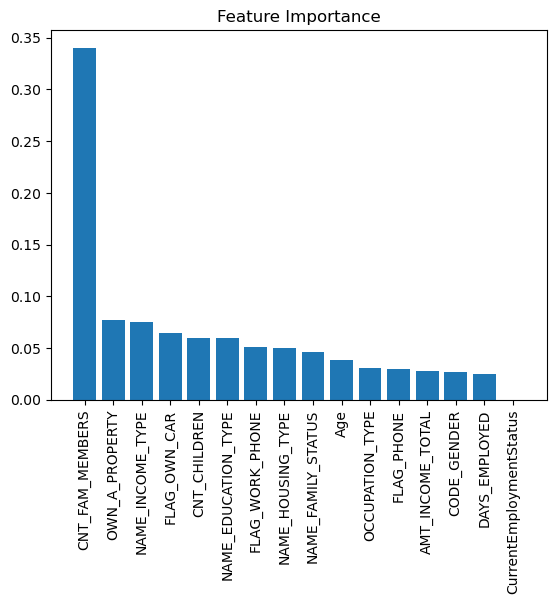

In [98]:
import matplotlib.pyplot as plt

importances = xg.feature_importances_
features = X_balance.columns
print(features,importances)
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features[i] for i in indices]

plt.figure()
plt.title("Feature Importance")

plt.bar(range(X_balance.shape[1]), importances[indices])

plt.xticks(range(X_balance.shape[1]), names, rotation=90)

plt.show()


### Phase 3

#### 
This part aims to provide a user-friendly web interface for predicting credit card approval using an XGBoost model. The interface is built using Gradio, a Python library for creating customizable UI components.

The web UI allows users to input various factors that may impact credit card approval, such as gender, car ownership, realty ownership, number of children, income, education type, family status, housing type, employment details, phone ownership, occupation type, family size, current employment status, and age.

Once the user provides these inputs, the XGBoost model, which has been trained on historical data, predicts the likelihood of credit card approval based on the provided information.

The interface also includes visualizations to provide additional insights. It displays a pie chart showing the distribution of genders in the dataset, providing an overview of the gender balance. Additionally, it presents a bar chart illustrating the importance of different features in the prediction model. This chart helps users understand which factors have the most significant impact on the credit card approval decision.

The project combines the power of machine learning with the simplicity of a web interface, allowing users to interactively predict credit card approval and gain insights into the decision-making process.

In [99]:
# Importing the libraries for pHase 3
import gradio as gr
import gradio.outputs as gr_outputs
import datetime

In [100]:
def predict_credit_approval( CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN,
                            AMT_INCOME_TOTAL, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS,
                            NAME_HOUSING_TYPE, DAYS_EMPLOYED, FLAG_WORK_PHONE, FLAG_PHONE,
                            OCCUPATION_TYPE, CNT_FAM_MEMBERS, CurrentEmploymentStatus, Age):
    # Convert categorical variables to numerical values

    if CODE_GENDER == "Male":
        CODE_GENDER = 1
    else:
        CODE_GENDER = 0
    if FLAG_OWN_CAR == "Yes":
        FLAG_OWN_CAR = 1
    else:
        FLAG_OWN_CAR = 0

    if FLAG_OWN_REALTY == "Yes":
        FLAG_OWN_REALTY = 1
    else:
        FLAG_OWN_REALTY = 0

    if NAME_INCOME_TYPE == "Working":
        NAME_INCOME_TYPE = 4
    if NAME_INCOME_TYPE=='Pensioner':
        NAME_INCOME_TYPE=1
    if NAME_INCOME_TYPE=='Student':
        NAME_INCOME_TYPE=3
        
    else:
        NAME_INCOME_TYPE = 0
        
        
    if NAME_EDUCATION_TYPE == "Higher education":
        NAME_EDUCATION_TYPE = 1
    if NAME_EDUCATION_TYPE == "Incomplete higher":
        NAME_EDUCATION_TYPE = 2
    if NAME_EDUCATION_TYPE == "Secondary / secondary special":
        NAME_EDUCATION_TYPE = 4
       
       
        
    else:
        NAME_EDUCATION_TYPE = 0



    if NAME_FAMILY_STATUS == "Single":
            NAME_FAMILY_STATUS = 1
    else:
            NAME_FAMILY_STATUS = 0



    if NAME_HOUSING_TYPE == "House / apartment":
            NAME_HOUSING_TYPE = 1
    if NAME_HOUSING_TYPE == "Office apartment":
            NAME_HOUSING_TYPE = 3
    if NAME_HOUSING_TYPE == "Municipal apartment":
            NAME_HOUSING_TYPE = 2
            
    if NAME_HOUSING_TYPE == "Rented apartment":
            NAME_HOUSING_TYPE = 4
    else:
        NAME_HOUSING_TYPE = 0



    if FLAG_WORK_PHONE == "Yes":
            FLAG_WORK_PHONE = 1
    else:
            FLAG_WORK_PHONE = 0
    if FLAG_PHONE == "Yes":
        FLAG_PHONE = 1
    else:
        FLAG_PHONE = 0





    if OCCUPATION_TYPE == "Other":
        OCCUPATION_TYPE = 12
        
    if OCCUPATION_TYPE == "Security staff":
        OCCUPATION_TYPE = 17
        
    if OCCUPATION_TYPE == "Medicine staff":
        OCCUPATION_TYPE = 11
        
    if OCCUPATION_TYPE == "Sales staff":
        OCCUPATION_TYPE = 15
        
    if OCCUPATION_TYPE == "Laborers":
        OCCUPATION_TYPE = 8
        
    if OCCUPATION_TYPE == "Cleaning staff":
        OCCUPATION_TYPE = 1
        
    if OCCUPATION_TYPE == "Cooking staff":
        OCCUPATION_TYPE = 2
                
    if OCCUPATION_TYPE == "Core staff":
        OCCUPATION_TYPE = 3
                
    if OCCUPATION_TYPE == "Drivers":
        OCCUPATION_TYPE = 4
                
    if OCCUPATION_TYPE == "HR staff":
        OCCUPATION_TYPE = 5
        
        
    else:
        OCCUPATION_TYPE = 0
        
    if CurrentEmploymentStatus == "Employed":
        CurrentEmploymentStatus = 1
    else:
        CurrentEmploymentStatus = 0
    
     # Create input_data dataframe with the provided data
    input_data = pd.DataFrame({
        
        'CODE_GENDER': [CODE_GENDER],
        'FLAG_OWN_CAR': [FLAG_OWN_CAR],
        'FLAG_OWN_REALTY': [FLAG_OWN_REALTY],
        'CNT_CHILDREN': [CNT_CHILDREN],
        'AMT_INCOME_TOTAL': [AMT_INCOME_TOTAL],
        'NAME_INCOME_TYPE': [NAME_INCOME_TYPE],
        'NAME_EDUCATION_TYPE': [NAME_EDUCATION_TYPE],
        'NAME_FAMILY_STATUS': [NAME_FAMILY_STATUS],
        'NAME_HOUSING_TYPE': [NAME_HOUSING_TYPE],
        'DAYS_EMPLOYED': [DAYS_EMPLOYED],
        'FLAG_WORK_PHONE': [FLAG_WORK_PHONE],
        'FLAG_PHONE': [FLAG_PHONE],
        'OCCUPATION_TYPE': [OCCUPATION_TYPE],
        'CNT_FAM_MEMBERS': [CNT_FAM_MEMBERS],
        'CurrentEmploymentStatus': [CurrentEmploymentStatus],
        'Age': [Age]
    })
     # Convert categorical columns in input_data to category type
    input_data['CODE_GENDER'] = input_data['CODE_GENDER'].astype('category')
    input_data['FLAG_OWN_CAR'] = input_data['FLAG_OWN_CAR'].astype('category')
    input_data['FLAG_OWN_REALTY'] = input_data['FLAG_OWN_REALTY'].astype('category')
    input_data['NAME_INCOME_TYPE'] = input_data['NAME_INCOME_TYPE'].astype('category')
    input_data['NAME_EDUCATION_TYPE'] = input_data['NAME_EDUCATION_TYPE'].astype('category')
    input_data['NAME_FAMILY_STATUS'] = input_data['NAME_FAMILY_STATUS'].astype('category')
    input_data['NAME_HOUSING_TYPE'] = input_data['NAME_HOUSING_TYPE'].astype('category')
    input_data['FLAG_WORK_PHONE'] = input_data['FLAG_WORK_PHONE'].astype('category')
    input_data['FLAG_PHONE'] = input_data['FLAG_PHONE'].astype('category')
    input_data['OCCUPATION_TYPE'] = input_data['OCCUPATION_TYPE'].astype('category')
    input_data['CurrentEmploymentStatus'] = input_data['CurrentEmploymentStatus'].astype('category')
    #input_data['Age']=input_data['Age'].astype('category')
    
    # Calculate feature importance
    importance = xg.feature_importances_
    feature_names = input_data.columns.tolist()

    # Create the first visualization: Pie chart of gender distribution
    features = X_balance.columns
    indices = np.argsort(importance)[::-1]
    gr.Image().style(full_width=True, height=30)
    names = [features[i] for i in indices]
    plt.figure(figsize=(10,10))
    gender_counts = df['CODE_GENDER'].value_counts()
    plt.subplot(2, 2, 1)
    plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
    plt.title('Gender Distribution')

    # Create the second visualization: Feature importance bar chart
    features = X_balance.columns
    indices = np.argsort(importance)[::-1]
    names = [features[i] for i in indices]
    plt.subplot(2, 2, 2)
    plt.bar(features, importance[indices])
    proper_names = ['Gender', 'Owns Car', 'Owns Property', 'Number of Children', 'Income Total', 'Income Type', 'Education Type', 'Family Status', 'Housing Type', 'Days Employed', 'Has Work Phone', 'Has Phone', 'Occupation Type', 'Family Size', 'Employment Status', 'Age']
    plt.xticks(range(X_balance.shape[1]), proper_names, rotation=90)  # Use proper_names instead of names
    plt.ylabel('Importance')
    #plt.xticks(rotation=90)
    plt.title("Impactful reasons on your approval status")

    # Adjust the layout and size of the plots
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
    fig = plt.gcf()
    fig.set_size_inches(8,8)  # Adjust the width and height of the figure

    plt.bar(features, importance[indices])
    plt.xticks(rotation=90)
    feature_importance = dict(zip(proper_names, importance))

    # Sort and extract the top 3 important features
    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

    top_features = []
    for feature, score in sorted_features[:3]:
        top_features.append(f"{feature} is the reason for your status with confidence of  {round(score*100,0)}%")

    # Perform prediction using the input_data
    prediction = xg.predict(np.float32(input_data))
    

    
    # Return the prediction result, top features, and the plots
    if prediction[0] == 0:
        return "Not Approved", top_features[0],top_features[1],fig,plt.gcf()
    else:
        return "Approved", top_features[0],top_features[1],fig,plt.gcf()



input_interface = [     
    gr.inputs.Radio(['female', 'male'], label="Sex"),
    gr.inputs.Radio(['Yes', 'No'], label="Do you own a Car?"),                                      
    gr.inputs.Radio(['Yes','No'], label="Do you own a Realty?"),                                    
    gr.inputs.Number(label="How many children you have as dependents?"),                            
    gr.inputs.Number(label="Whats your annual Income in $?"),                                            
    gr.inputs.Radio(['Working','Pensioner','Student','Other'], label="Whats your Income Type?"),                  
    gr.inputs.Radio(['Higher education','Secondary','Incomplete higher','Other'], label="Whats your highest Qualification?"),   
    gr.inputs.Radio(['Single','Married'], label="Whats your maritial status?"),                     
    gr.inputs.Dropdown(['House / apartment', 'Office apartment', 'Municipal apartment', 'Rented apartment', 'Other'], label="The property where you live is __________?"),
    gr.inputs.Number(label="Enter Number of Days Employed "),                                      
    gr.inputs.Radio(['Yes','No'], label="Do you have a work phone?"),                                                        
    gr.inputs.Radio(['Yes','No'], label="Do you have a personal cell?"),                                                    
    gr.inputs.Dropdown(['Security staff', 'Medicine staff', 'Sales staff', 'Laborers', 'Cleaning staff', 'Cooking staff', 'Core staff', 'HR staff', 'Drivers', 'Others'], label="What is your occupation?"),
    gr.inputs.Number(label="How many family members you have?"),                                                         
    gr.inputs.Radio(['Employed','Unemployed'], label="Are you currently Employed?"),                                           
    gr.inputs.Number(label="Whats your Age?"),                                                      
]


output_interface = [    
    gr.outputs.Textbox(label="Approval Decision"),    
    gr.outputs.Textbox(label="Top Feature 1 which led to the decision"),    
    gr.outputs.Textbox(label="Top Feature 2 which led to the decision"),
    gr.Plot()    
    
]



gr.themes.Monochrome()
gr.Interface(
    fn=predict_credit_approval,
    inputs=input_interface,
    outputs=output_interface,
    title="Credit Card Approval Prediction",
    description="Enter the required details to predict the approval percentage",
    layout="unaligned",
    theme="peach"
    ).launch()


C:\Users\jeeva\AppData\Roaming\Python\Python39\site-packages\gradio\inputs.py:183: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\jeeva\AppData\Roaming\Python\Python39\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\jeeva\AppData\Roaming\Python\Python39\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\jeeva\AppData\Roaming\Python\Python39\site-packages\gradio\inputs.py:217: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\jeeva\AppData\Roaming\Python\Python39\site-packages\gradio\outputs.py:22: UserWa

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


C:\Users\jeeva\AppData\Roaming\Python\Python39\site-packages\gradio\components.py:167: UserWarning: Unknown style parameter: full_width
  warnings.warn(f"Unknown style parameter: {key}")
C:\Users\jeeva\AppData\Roaming\Python\Python39\site-packages\gradio\components.py:167: UserWarning: Unknown style parameter: full_width
  warnings.warn(f"Unknown style parameter: {key}")
C:\Users\jeeva\AppData\Roaming\Python\Python39\site-packages\gradio\components.py:167: UserWarning: Unknown style parameter: full_width
  warnings.warn(f"Unknown style parameter: {key}")


## REFERENCES
1.https://xgboost.readthedocs.io/en/stable/

2.https://www.ibm.com/topics/random-forest#:~:text=Random%20forest%20is%20a%20commonly,both%20classification%20and%20regression%20problems.

3.https://gradio.app/docs/